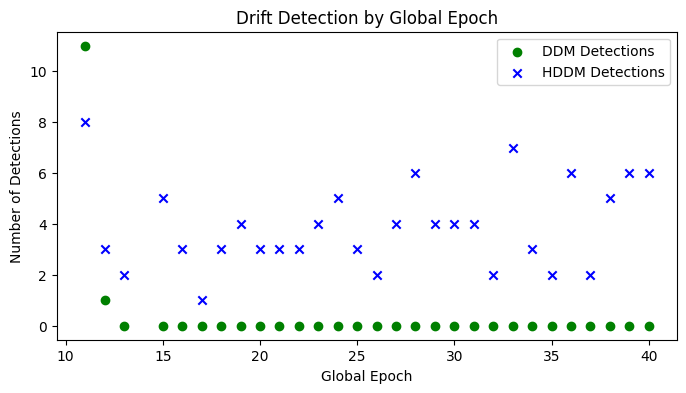

In [43]:
import re
import matplotlib.pyplot as plt

# Function to extract the drift detection information
def parse_log_file(file_path):
    global_epochs = []
    ddm_detections = []
    hddm_detections = []
    
    with open(file_path, 'r') as file:
        lines = file.readlines()
        current_epoch = None
        ddm_count = 0
        hddm_count = 0
        
        for line in lines:
            # Search for global epoch
            epoch_match = re.search(r'Global Epoch (\d+)', line)
            if epoch_match:
                # Save previous detection counts before starting a new epoch
                if current_epoch is not None:
                    ddm_detections.append(ddm_count)
                    hddm_detections.append(hddm_count)
                    ddm_count = 0  # Reset for next epoch
                    hddm_count = 0
                
                current_epoch = int(epoch_match.group(1))
                global_epochs.append(current_epoch)
            
            # Search for DDM detections
            ddm_match = re.search(r'ddm:\[(.*?)\]', line)
            if ddm_match:
                ddm_values = ddm_match.group(1).split(',')
                ddm_values = [int(value) for value in ddm_values if value]
                ddm_count = len(ddm_values)  # Update detection count for current epoch
            
            # Search for HDDM detections
            hddm_match = re.search(r'hddm\[(.*?)\]', line)
            if hddm_match:
                hddm_values = hddm_match.group(1).split(',')
                hddm_values = [int(value) for value in hddm_values if value]
                hddm_count = len(hddm_values)  # Update detection count for current epoch
        
        # Append counts for the last epoch
        if current_epoch is not None:
            ddm_detections.append(ddm_count)
            hddm_detections.append(hddm_count)

    return global_epochs, ddm_detections, hddm_detections

# Function to plot the detection counts
def plot_detections(global_epochs, ddm_detections, hddm_detections):
    # Filter out epochs where both DDM and HDDM counts are zero
    filtered_epochs = []
    filtered_ddm_detections = []
    filtered_hddm_detections = []

    for epoch, ddm_count, hddm_count in zip(global_epochs, ddm_detections, hddm_detections):
        if hddm_count > 0:  # Only keep epochs with detections
            filtered_epochs.append(epoch)
            filtered_ddm_detections.append(ddm_count)
            filtered_hddm_detections.append(hddm_count)

    plt.figure(figsize=(8, 4))
    plt.scatter(filtered_epochs, filtered_ddm_detections, label='DDM Detections', marker='o', color='g')
    plt.scatter(filtered_epochs, filtered_hddm_detections, label='HDDM Detections', marker='x', color='b')
    
    plt.title('Drift Detection by Global Epoch')
    plt.xlabel('Global Epoch')
    plt.ylabel('Number of Detections')
    plt.legend()
    plt.grid(False)
    plt.savefig("multiflfow_exp2.pdf", format="pdf", bbox_inches='tight')
    plt.show()

# Main function to parse the log file and plot
def main(log_file_path):
    global_epochs, ddm_detections, hddm_detections = parse_log_file(log_file_path)
    plot_detections(global_epochs, ddm_detections, hddm_detections)

# Example usage
log_file_path = "/kaggle/input/log-txt/multiflow_exp_2.txt"
main(log_file_path)


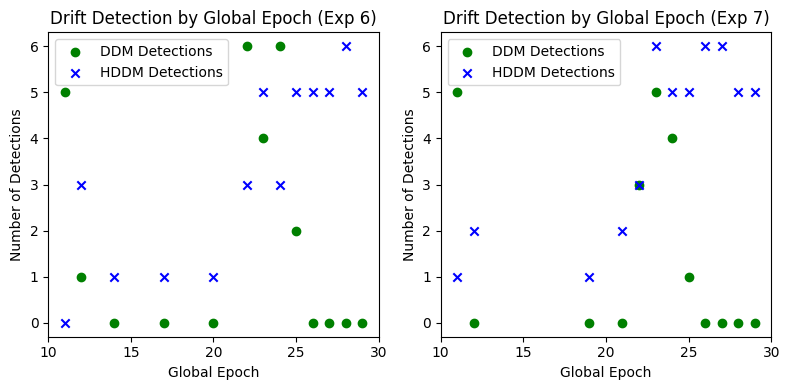

In [6]:
import re
import matplotlib.pyplot as plt

# Function to extract the drift detection information
def parse_log_file(file_path):
    global_epochs = []
    ddm_detections = []
    hddm_detections = []
    
    with open(file_path, 'r') as file:
        lines = file.readlines()
        current_epoch = None
        ddm_count = 0
        hddm_count = 0
        
        for line in lines:
            # Search for global epoch
            epoch_match = re.search(r'Global Epoch (\d+)', line)
            if epoch_match:
                # Save previous detection counts before starting a new epoch
                if current_epoch is not None:
                    ddm_detections.append(ddm_count)
                    hddm_detections.append(hddm_count)
                    ddm_count = 0  # Reset for next epoch
                    hddm_count = 0
                
                current_epoch = int(epoch_match.group(1))
                global_epochs.append(current_epoch)
            
            # Search for DDM detections
            ddm_match = re.search(r'ddm:\[(.*?)\]', line)
            if ddm_match:
                ddm_values = ddm_match.group(1).split(',')
                ddm_values = [int(value) for value in ddm_values if value]
                ddm_count = len(ddm_values)  # Update detection count for current epoch
            
            # Search for HDDM detections
            hddm_match = re.search(r'hddm\[(.*?)\]', line)
            if hddm_match:
                hddm_values = hddm_match.group(1).split(',')
                hddm_values = [int(value) for value in hddm_values if value]
                hddm_count = len(hddm_values)  # Update detection count for current epoch
        
        # Append counts for the last epoch
        if current_epoch is not None:
            ddm_detections.append(ddm_count)
            hddm_detections.append(hddm_count)

    return global_epochs, ddm_detections, hddm_detections

# Function to plot the detection counts in subplots
def plot_detections(log_files):
    fig, axs = plt.subplots(1,len(log_files), figsize=(8, 4), sharex=True)

    for i, log_file in enumerate(log_files):
        global_epochs, ddm_detections, hddm_detections = parse_log_file(log_file)
        
        # Filter out epochs where both DDM and HDDM counts are zero
        filtered_epochs = []
        filtered_ddm_detections = []
        filtered_hddm_detections = []

        for epoch, ddm_count, hddm_count in zip(global_epochs, ddm_detections, hddm_detections):
            if ddm_count > 0 or hddm_count > 0:  # Only keep epochs with detections
                filtered_epochs.append(epoch)
                filtered_ddm_detections.append(ddm_count)
                filtered_hddm_detections.append(hddm_count)

        axs[i].scatter(filtered_epochs, filtered_ddm_detections, label='DDM Detections', marker='o', color='g')
        axs[i].scatter(filtered_epochs, filtered_hddm_detections, label='HDDM Detections', marker='x', color='b')
        
        if 'exp_6' in log_files[i]:
            axs[i].set_title('Drift Detection by Global Epoch (Exp 6)')
        else:
            axs[i].set_title('Drift Detection by Global Epoch (Exp 7)')
        axs[i].set_xlabel('Global Epoch')
        axs[i].set_ylabel('Number of Detections')
        axs[i].set_xticks(range(10, 31, 5)) 
        axs[i].legend()
        axs[i].grid(False)
        


    plt.tight_layout()
    plt.savefig("multiflow_exp67.pdf", format="pdf", bbox_inches='tight')
    plt.show()

# Main function to parse the log files and plot
def main(log_file_paths):
    plot_detections(log_file_paths)

# Example usage
log_file_paths = ["/kaggle/input/log-txt/multiflow_exp_6.txt", "/kaggle/input/log-txt/multiflow_exp_7.txt"]
main(log_file_paths)


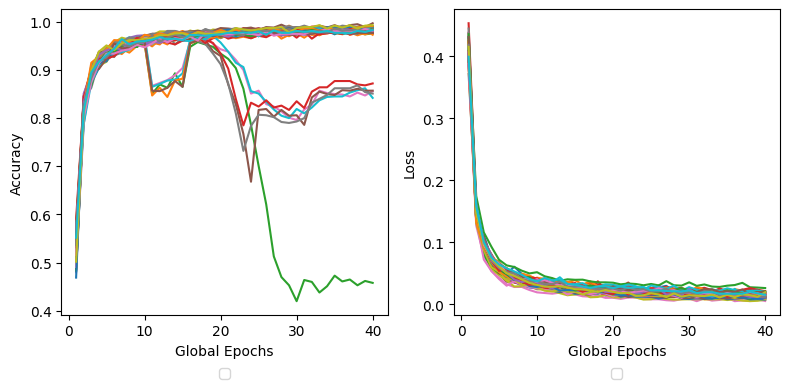

In [42]:
import matplotlib.pyplot as plt

# Initialize lists to store client accuracies and losses
client_accuracies = [[] for _ in range(60)]
client_losses = [[] for _ in range(60)]

# Read the contents of the accuracy file
with open("//kaggle/input/log-txt/08042024_2253.txt", "r") as file:
    lines = file.readlines()

# Parse the lines and extract accuracy values for each client
for line in lines:
    if "Training Client" in line:
        parts = line.split(" ")
        client_idx = int(parts[2].split("/")[0]) - 1
    elif line.startswith("Epoch 1/1"):
        accuracy = float(line.split("Accuracy: ")[1].strip())
        client_accuracies[client_idx].append(accuracy)

# Read the contents of the loss file
with open("/kaggle/input/log-txt/24082024_1451.txt", "r") as file:  # Adjust file name if needed
    lines = file.readlines()

# Parse the lines and extract loss values for each client
for line in lines:
    if "Training Client" in line:
        parts = line.split(" ")
        client_idx = int(parts[2].split("/")[0]) - 1
    elif line.startswith("Epoch"):
        loss = float(line.split(", Loss: ")[1].split(",")[0])
        client_losses[client_idx].append(loss/120)  # Adjust normalization if necessary

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(8, 4))  # Adjust figsize as needed

# Plot accuracy on the first subplot
for i, accuracies in enumerate(client_accuracies):
    if len(accuracies) >= 8:
        axs[0].plot(range(1, len(accuracies) + 1), accuracies)

axs[0].set_xlabel("Global Epochs")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8)
axs[0].grid(False)
axs[0].set_xticks(range(0, 41, 10))  # Start x-axis ticks from 1

# Plot loss on the second subplot
for i, losses in enumerate(client_losses):
    if losses:  # Check if there are any losses recorded for this client
        axs[1].plot(range(1, len(losses) + 1), losses)

axs[1].set_xlabel("Global Epochs")
axs[1].set_ylabel("Loss")
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8)
axs[1].grid(False)
axs[1].set_xticks(range(0, 41, 10))  # Set xticks based on maximum epochs any client has

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure as a high-resolution PDF
plt.savefig("nodrift1020.pdf", format="pdf", bbox_inches='tight')
plt.show()


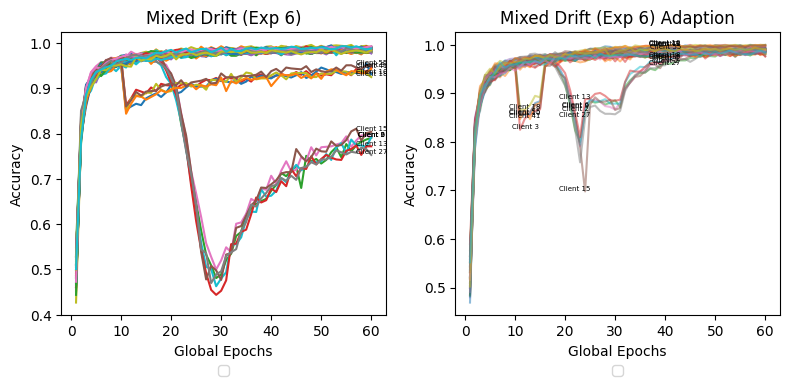

In [5]:
import matplotlib.pyplot as plt

# Initialize lists to store client accuracies and losses
client_accuracies = [[] for _ in range(60)]
client_accuracies_2 = [[] for _ in range(60)]

# Read the contents of the accuracy file
# 03072024.txt, 08042024_2055.txt, 21072024.txt
with open("/kaggle/input/log-txt/mix_drift.txt", "r") as file:
    lines = file.readlines()

# Parse the lines and extract accuracy values for each client
for line in lines:
    if "Training Client" in line:
        parts = line.split(" ")
        client_idx = int(parts[2].split("/")[0]) - 1
    elif line.startswith("Epoch 1/1"):
        accuracy = float(line.split("Accuracy: ")[1].strip())
        client_accuracies[client_idx].append(accuracy)

# Read the contents of the loss file 21072024
with open("/kaggle/input/log-txt/mix_drift_adap.txt", "r") as file:  # Adjust file name if needed
    lines = file.readlines()

# Parse the lines and extract loss values for each client
for line in lines:
    if "Training Client" in line:
        parts = line.split(" ")
        client_idx = int(parts[2].split("/")[0]) - 1
    elif line.startswith("Epoch 1/1"):
        accuracy = float(line.split("Accuracy: ")[1].strip())
        client_accuracies_2[client_idx].append(accuracy)  # Adjust normalization if necessary

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(8, 4))  # Adjust figsize as needed
c = [2, 6, 9, 13, 15, 27]
d = [3, 10, 18, 41, 55]

# Plot accuracy on the first subplot
for i, accuracies in enumerate(client_accuracies):
    if len(accuracies) >= 8:
        axs[0].plot(range(1, len(accuracies) + 1), accuracies)
        
        if i in c:
            axs[0].text(60, accuracies[59], f'Client {i}', fontsize=5,
                        verticalalignment='bottom', horizontalalignment='center')
        if i in d:
            axs[0].text(60, accuracies[59], f'Client {i}', fontsize=5,
                        verticalalignment='bottom', horizontalalignment='center')

axs[0].set_xlabel("Global Epochs")
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Mixed Drift (Exp 6)")
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
axs[0].grid(False)
axs[0].set_xticks(range(0, 61, 10))  # Start x-axis ticks from 1

# Plot loss on the second subplot
for i, accuracies in enumerate(client_accuracies_2):
    if len(accuracies) >= 8:
        epochs = range(1, len(accuracies) + 1)
        axs[1].plot(range(1, len(accuracies) + 1), accuracies, alpha=0.5)
        
        # Annotate the client ID only if it's in list c or d
        if i in c:
            axs[1].text(22, accuracies[23], f'Client {i}', fontsize=5,
                        verticalalignment='bottom', horizontalalignment='center')
            axs[1].text(40, accuracies[39], f'Client {i}', fontsize=5,
                        verticalalignment='bottom', horizontalalignment='center')
        if i in d:
            axs[1].text(12, accuracies[10], f'Client {i}', fontsize=5,
                        verticalalignment='bottom', horizontalalignment='center')
            axs[1].text(40, accuracies[39], f'Client {i}', fontsize=5,
                        verticalalignment='bottom', horizontalalignment='center')

axs[1].set_xlabel("Global Epochs")
axs[1].set_ylabel("Accuracy")
axs[1].set_title("Mixed Drift (Exp 6) Adaption")
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
axs[1].grid(False)
axs[1].set_xticks(range(0, 61, 10))  # Set xticks based on maximum epochs any client has

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure as a high-resolution PDF
plt.savefig("mix_drift.pdf", format="pdf", bbox_inches='tight') 
plt.show()


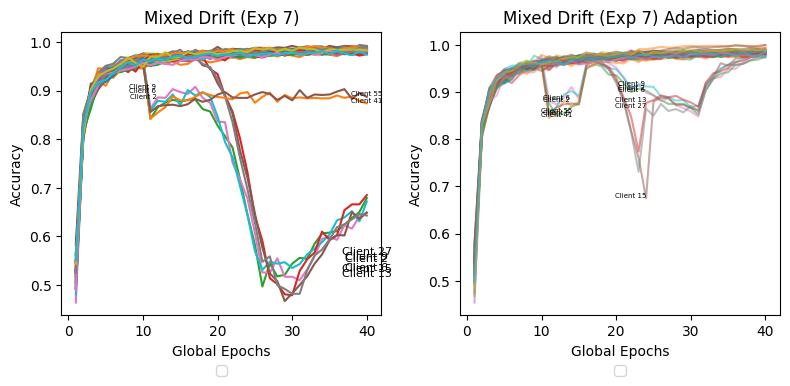

In [1]:
import matplotlib.pyplot as plt

# Initialize lists to store client accuracies and losses
client_accuracies = [[] for _ in range(60)]
client_accuracies_2 = [[] for _ in range(60)]

# Read the contents of the accuracy file
# 03072024.txt, 08042024_2055.txt, 21072024.txt
with open("/kaggle/input/log-txt/21072024.txt", "r") as file:
    lines = file.readlines()

# Parse the lines and extract accuracy values for each client
for line in lines:
    if "Training Client" in line:
        parts = line.split(" ")
        client_idx = int(parts[2].split("/")[0]) - 1
    elif line.startswith("Epoch 1/1"):
        accuracy = float(line.split("Accuracy: ")[1].strip())
        client_accuracies[client_idx].append(accuracy)

# Read the contents of the loss file 21072024
with open("/kaggle/input/log-txt/hybrid_drift_10092024.txt", "r") as file:  # Adjust file name if needed
    lines = file.readlines()

# Parse the lines and extract loss values for each client
for line in lines:
    if "Training Client" in line:
        parts = line.split(" ")
        client_idx = int(parts[2].split("/")[0]) - 1
    elif line.startswith("Epoch 1/1"):
        accuracy = float(line.split("Accuracy: ")[1].strip())
        client_accuracies_2[client_idx].append(accuracy)  # Adjust normalization if necessary

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(8, 4))  # Adjust figsize as needed
c = [2, 6, 9, 13, 15, 27]
d = [2, 6, 9, 41, 55]

# Plot accuracy on the first subplot
for i, accuracies in enumerate(client_accuracies):
    if len(accuracies) >= 8:
        axs[0].plot(range(1, len(accuracies) + 1), accuracies)
        
        if i in c:
            axs[0].text(40, accuracies[26], f'Client {i}', fontsize=5,
                        verticalalignment='bottom', horizontalalignment='center')
        if (i in d) and (i not in c):
            axs[0].text(40, accuracies[39], f'Client {i}', fontsize=5,
                        verticalalignment='bottom', horizontalalignment='center')
        if i in c and i in d:
            axs[0].text(10, accuracies[15], f'Client {i}', fontsize=5,
                        verticalalignment='bottom', horizontalalignment='center')

axs[0].set_xlabel("Global Epochs")
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Mixed Drift (Exp 7)")
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
axs[0].grid(False)
axs[0].set_xticks(range(0, 41, 10))  # Start x-axis ticks from 1

# Plot loss on the second subplot
for i, accuracies in enumerate(client_accuracies_2):
    if len(accuracies) >= 8:
        epochs = range(1, len(accuracies) + 1)
        axs[1].plot(range(1, len(accuracies) + 1), accuracies, alpha=0.5)
        
        # Annotate the client ID only if it's in list c or d
        if i in c:
            axs[1].text(22, accuracies[23], f'Client {i}', fontsize=5,
                        verticalalignment='bottom', horizontalalignment='center')
#             axs[1].text(40, accuracies[39], f'Client {i}', fontsize=5,
#                         verticalalignment='bottom', horizontalalignment='center')
        if i in d:
            axs[1].text(12, accuracies[10], f'Client {i}', fontsize=5,
                        verticalalignment='bottom', horizontalalignment='center')
#             axs[1].text(40, accuracies[39], f'Client {i}', fontsize=5,
#                         verticalalignment='bottom', horizontalalignment='center')

axs[1].set_xlabel("Global Epochs")
axs[1].set_ylabel("Accuracy")
axs[1].set_title("Mixed Drift (Exp 7) Adaption")
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
axs[1].grid(False)
axs[1].set_xticks(range(0, 41, 10))  # Set xticks based on maximum epochs any client has

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure as a high-resolution PDF
plt.savefig("mix_drift_2.pdf", format="pdf", bbox_inches='tight') 
plt.show()


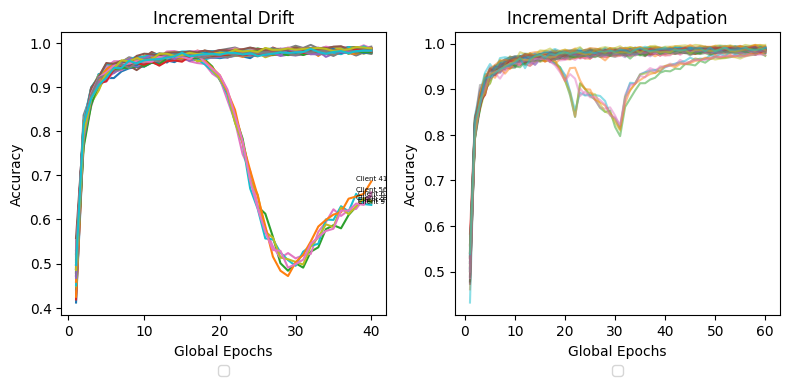

In [7]:
import matplotlib.pyplot as plt

# Initialize lists to store client accuracies and losses
client_accuracies = [[] for _ in range(60)]
client_accuracies_2 = [[] for _ in range(60)]

# Read the contents of the accuracy file
# 03072024.txt, 08042024_2055.txt, 21072024.txt
with open("/kaggle/input/log-txt/gdrift_60_40_30_nadap.txt", "r") as file:
    lines = file.readlines()

# Parse the lines and extract accuracy values for each client
for line in lines:
    if "Training Client" in line:
        parts = line.split(" ")
        client_idx = int(parts[2].split("/")[0]) - 1
    elif line.startswith("Epoch 1/1"):
        accuracy = float(line.split("Accuracy: ")[1].strip())
        client_accuracies[client_idx].append(accuracy)

# Read the contents of the loss file 21072024
with open("/kaggle/input/log-txt/gdrift_60_40_30_adap.txt", "r") as file:  # Adjust file name if needed
    lines = file.readlines()

# Parse the lines and extract loss values for each client
for line in lines:
    if "Training Client" in line:
        parts = line.split(" ")
        client_idx = int(parts[2].split("/")[0]) - 1
    elif line.startswith("Epoch 1/1"):
        accuracy = float(line.split("Accuracy: ")[1].strip())
        client_accuracies_2[client_idx].append(accuracy)  # Adjust normalization if necessary

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(8, 4))  # Adjust figsize as needed
c = [2, 6, 9, 13, 15, 27]
d = [3, 10, 18, 41, 55]
e = [2,6,9,28,41,56]

# Plot accuracy on the first subplot
for i, accuracies in enumerate(client_accuracies):
    if len(accuracies) >= 8:
        axs[0].plot(range(1, len(accuracies) + 1), accuracies)
        
        if i in e:
            axs[0].text(40, accuracies[39], f'Client {i}', fontsize=5,
                        verticalalignment='bottom', horizontalalignment='center')
#         if i in d:
#             axs[0].text(40, accuracies[39], f'Client {i}', fontsize=5,
#                         verticalalignment='bottom', horizontalalignment='center')

axs[0].set_xlabel("Global Epochs")
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Incremental Drift")
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
axs[0].grid(False)
axs[0].set_xticks(range(0, 41, 10))  # Start x-axis ticks from 1

# Plot loss on the second subplot
for i, accuracies in enumerate(client_accuracies_2):
    if len(accuracies) >= 8:
        epochs = range(1, len(accuracies) + 1)
        axs[1].plot(range(1, len(accuracies) + 1), accuracies, alpha=0.5)
        
        # Annotate the client ID only if it's in list c or d
#         if i in e:
#             axs[1].text(22, accuracies[23], f'Client {i}', fontsize=5,
#                         verticalalignment='bottom', horizontalalignment='center')
#             axs[1].text(40, accuracies[39], f'Client {i}', fontsize=5,
#                         verticalalignment='bottom', horizontalalignment='center')
#         if i in d:
#             axs[1].text(12, accuracies[10], f'Client {i}', fontsize=5,
#                         verticalalignment='bottom', horizontalalignment='center')
#             axs[1].text(40, accuracies[39], f'Client {i}', fontsize=5,
#                         verticalalignment='bottom', horizontalalignment='center')

axs[1].set_xlabel("Global Epochs")
axs[1].set_ylabel("Accuracy")
axs[1].set_title("Incremental Drift Adpation")
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
axs[1].grid(False)
axs[1].set_xticks(range(0, 61, 10))  # Set xticks based on maximum epochs any client has

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure as a high-resolution PDF
plt.savefig("incre_drift.pdf", format="pdf", bbox_inches='tight') 
plt.show()


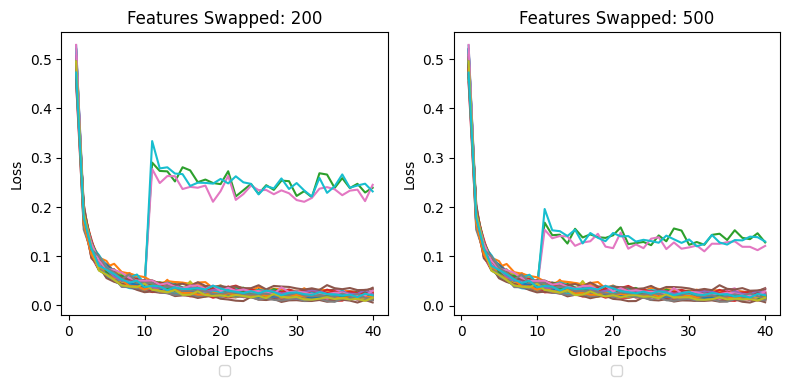

In [77]:
import matplotlib.pyplot as plt
# Read the contents of the text file, associted log files start with 18082024, feautes 500,100,300

# Initialize lists to store client losses for 200 and 500 features swapped
client_losses_200 = [[] for _ in range(60)]
client_losses_500 = [[] for _ in range(60)]

# Read the contents of the text file for 200 features swapped
with open("/kaggle/input/log-txt/25082024_1516.txt", "r") as file:
    lines = file.readlines()

# Parse the lines and extract loss values for each client (200 features swapped)
for line in lines:
    if "Training Client" in line:
        parts = line.split(" ")
        client_idx = int(parts[2].split("/")[0]) - 1
    elif line.startswith("Epoch"):
        loss = float(line.split(", Loss: ")[1].split(",")[0])
        client_losses_200[client_idx].append(loss/100)

# Read the contents of the text file for 500 features swapped
with open("/kaggle/input/log-txt/10072024_1225.txt", "r") as file:
    lines = file.readlines()

# Parse the lines and extract loss values for each client (500 features swapped)
for line in lines:
    if "Training Client" in line:
        parts = line.split(" ")
        client_idx = int(parts[2].split("/")[0]) - 1
    elif line.startswith("Epoch"):
        loss = float(line.split(", Loss: ")[1].split(",")[0])
        client_losses_500[client_idx].append(loss/100)

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot for 200 features swapped on the first subplot
for i, losses in enumerate(client_losses_200):
    if losses:  # Check if there are any losses recorded for this client
        axs[0].plot(range(1, len(losses) + 1), losses)

axs[0].set_xlabel("Global Epochs")
axs[0].set_ylabel("Loss")
axs[0].set_title("Features Swapped: 200")
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8)
axs[0].grid(False)
axs[1].set_xticks(range(0, 41, 10))

# Plot for 500 features swapped on the second subplot
for i, losses in enumerate(client_losses_500):
    if losses:  # Check if there are any losses recorded for this client
        axs[1].plot(range(1, len(losses) + 1), losses)

axs[1].set_xlabel("Global Epochs")
axs[1].set_ylabel("Loss")
axs[1].set_title("Features Swapped: 500")
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8)
axs[1].grid(False)
axs[1].set_xticks(range(0, 41, 10))

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the combined figure as a high-resolution PNG
plt.savefig("feature_swap_comparison.pdf", format="pdf", bbox_inches='tight')
plt.show()


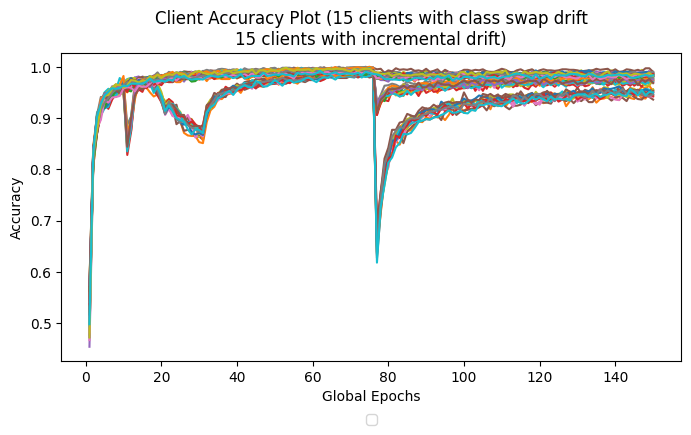

In [3]:
#global drift accuracy 
import matplotlib.pyplot as plt

# Initialize lists to store client accuracies
client_accuracies = [[] for _ in range(60)]

# Read the contents of the text file 18082024_1925 feature swap
with open("/kaggle/input/log-txt/optm_15_15_26102024.txt", "r") as file:
    lines = file.readlines()

# Parse the lines and extract accuracy values for each client
for line in lines:
    if "Training Client" in line:
        parts = line.split(" ")
        client_idx = int(parts[2].split("/")[0]) - 1
    elif line.startswith("Epoch 1/1"):
        accuracy = float(line.split("Accuracy: ")[1].strip())
        client_accuracies[client_idx].append(accuracy)

# Plotting
plt.figure(figsize=(8, 4))
for i, accuracies in enumerate(client_accuracies):
    # Skip clients with less than 8 epochs of data
    if len(accuracies) >= 8:
        plt.plot(range(1, len(accuracies) + 1), accuracies)

plt.xlabel("Global Epochs")
plt.ylabel("Accuracy")
plt.title("Client Accuracy Plot (15 clients with class swap drift\n15 clients with incremental drift)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8)
plt.grid(False)
plt.xticks(range(0, 150, 20))  # Start x-axis ticks from 1
plt.savefig("acc_optm1515.pdf", format="pdf", bbox_inches='tight') 
plt.show()


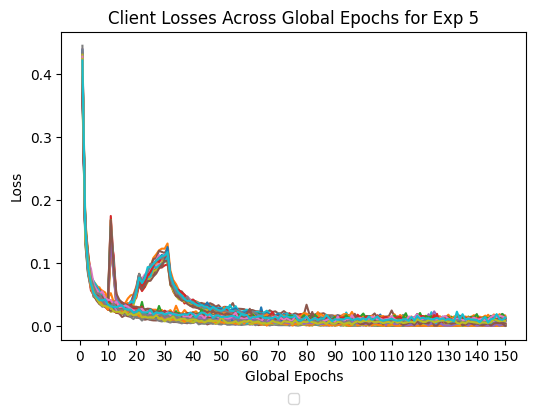

In [1]:
## global datast drift , script: client_global_drift
import matplotlib.pyplot as plt

# Initialize lists to store client losses
client_losses = [[] for _ in range(60)]

# Read the contents of the text file,
# associted log files start with 18082024 time stamp from 1644, 10 60, (60,swapped classes: 3,8,5,6)
#last one is feature swapped, timestamp 1925
with open("/kaggle/input/log-txt/optm_15_15_18102024.txt", "r") as file:
    lines = file.readlines()

    
# Parse the lines and extract loss values for each client
for line in lines:
    if "Training Client" in line:
        parts = line.split(" ")
        client_idx = int(parts[2].split("/")[0]) - 1
    elif line.startswith("Epoch"):
        loss = float(line.split(", Loss: ")[1].split(",")[0])
        client_losses[client_idx].append(loss/120)

# Plotting
plt.figure(figsize=(6, 4))
for i, losses in enumerate(client_losses):
    if losses:  # Check if there are any losses recorded for this client
        plt.plot(range(1, len(losses) + 1), losses)

plt.xlabel("Global Epochs")
plt.ylabel("Loss")
plt.title("Client Losses Across Global Epochs for Exp 5")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8)
plt.grid(False)
plt.xticks(range(0, max(len(losses) for losses in client_losses) + 1,10))  # Set xticks based on maximum epochs any client has
plt.savefig("l1020n.pdf", format="pdf", bbox_inches='tight') 
plt.show()


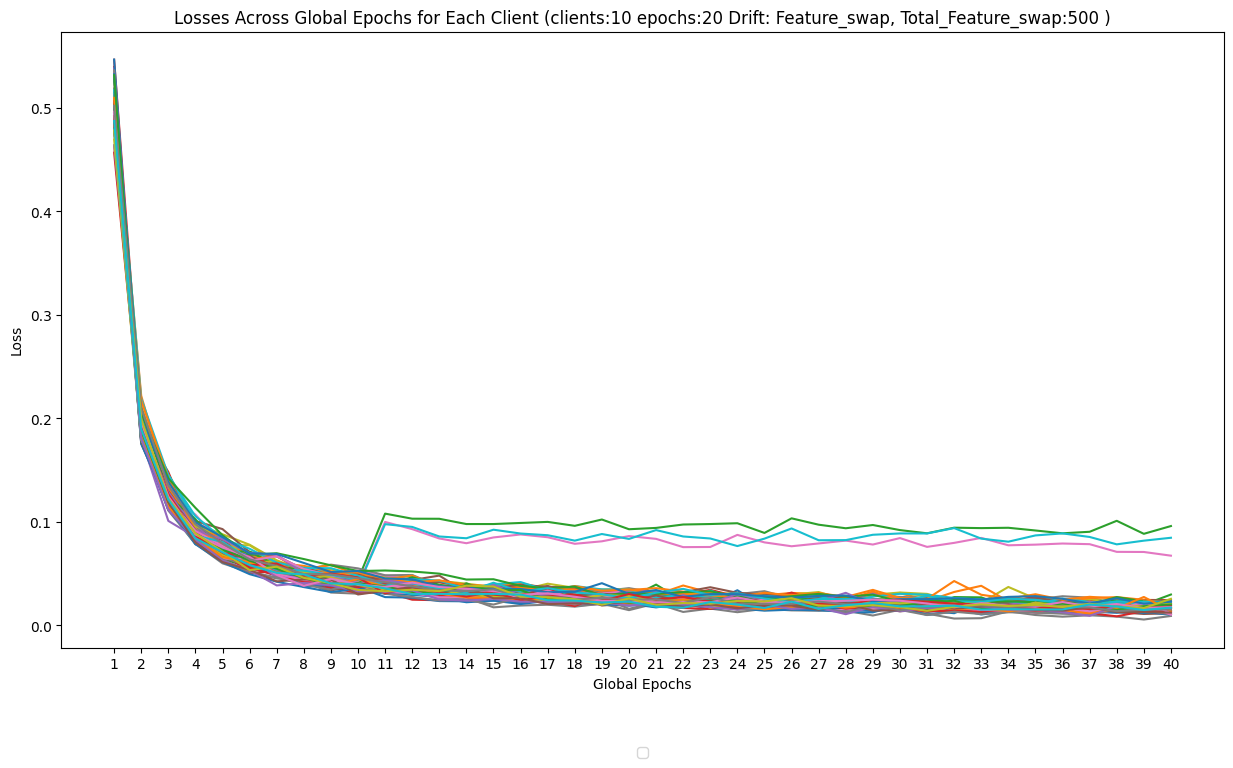

In [5]:
## feature swap
import matplotlib.pyplot as plt

# Initialize lists to store client losses
client_losses = [[] for _ in range(60)]

# Read the contents of the text file, associted log files start with 18082024, feautes 500,100,300
with open("/kaggle/input/log-txt/18082024_1301.txt", "r") as file:
    lines = file.readlines()

# Parse the lines and extract loss values for each client
for line in lines:
    if "Training Client" in line:
        parts = line.split(" ")
        client_idx = int(parts[2].split("/")[0]) - 1
    elif line.startswith("Epoch"):
        loss = float(line.split(", Loss: ")[1].split(",")[0])
        client_losses[client_idx].append(loss/100)

# Plotting
plt.figure(figsize=(15, 8))
for i, losses in enumerate(client_losses):
    if losses:  # Check if there are any losses recorded for this client
        plt.plot(range(1, len(losses) + 1), losses)

plt.xlabel("Global Epochs")
plt.ylabel("Loss")
plt.title("Losses Across Global Epochs for Each Client (clients:10 epochs:20 Drift: Feature_swap, Total_Feature_swap:500 )")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8)
plt.grid(False)
plt.xticks(range(1, max(len(losses) for losses in client_losses) + 1))  # Set xticks based on maximum epochs any client has
plt.savefig("file_name.png")
plt.show()


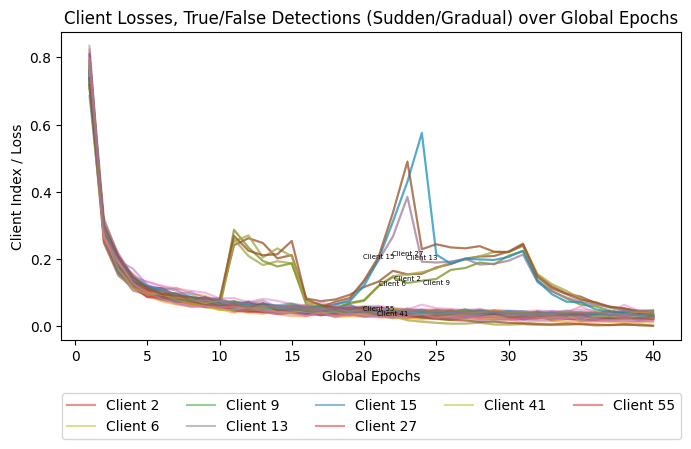

In [1]:
import matplotlib.pyplot as plt

# Initialize lists to store client losses, true detections, false detections, and detection types
client_losses = [[] for _ in range(60)]
true_detections = []
false_detections = []

# Read the contents of the text file
# 08042024_2253
with open("/kaggle/input/log-txt/hybrid_drift_10092024.txt", "r") as file:
    lines = file.readlines()

# Parse the lines and extract values
client_idx = -1
for line in lines:
    if "Training Client" in line:
        parts = line.split(" ")
        client_idx = int(parts[2].split("/")[0]) - 1
    elif line.startswith("Epoch 1/1"):
        loss = float(line.split(", Loss: ")[1].split(",")[0])
        client_losses[client_idx].append(loss/64)
    elif "True Drift Detected" in line or "False Drift Detected" in line:
        parts = line.split(", ")
        if len(parts) < 2:
            print(f"Skipping line due to unexpected format: {line.strip()}")
            continue
        epoch_info = parts[0].split(" ")
        global_epoch = int(epoch_info[2])
        client_info = parts[1].split(" ")
        client_idx = int(client_info[1].split(":")[0]) - 1
        drift_type = "Sudden" if "Sudden" in line else "Gradual"
        detection_type = "True" if "True Drift Detected" in line else "False"

        if detection_type == "True":
            true_detections.append((global_epoch, client_idx, drift_type))
        else:
            false_detections.append((global_epoch, client_idx, drift_type))

# Plotting all data in a single plot
plt.figure(figsize=(8, 4))
c = [2, 6, 9,13,15,27,41,55]

# Plot client losses
for i, losses in enumerate(client_losses):
    if len(losses) >= 1:  # Plot from the first epoch
        epochs = range(1, len(losses) + 1)
        plt.plot(epochs, losses, alpha=0.5)
        
        # Annotate the client ID at the maximum loss value (or the last value)
        if i in c:
            plt.plot(epochs, losses, alpha=0.5, label=f"Client {i}")
            mid_epoch_idx = len(losses) // 2
            mid_loss = losses[mid_epoch_idx]
            horizontal_offset = (i % 5) * 1 
            plt.text(mid_epoch_idx + 1 + horizontal_offset, mid_loss, f'Client {i}', fontsize=5,verticalalignment='bottom', horizontalalignment='center')

#         # Plot true detections
#         true_sudden_points = [(epoch, losses[epoch - 1]) for epoch, client, drift in true_detections if client == i and drift == "Sudden"]
#         true_gradual_points = [(epoch, losses[epoch - 1]) for epoch, client, drift in true_detections if client == i and drift == "Gradual"]
#         for epoch, loss in true_sudden_points:
#             plt.scatter(epoch, loss, color='g', marker='o')
#         for epoch, loss in true_gradual_points:
#             plt.scatter(epoch, loss, color='b', marker='o')

#         # Plot false detections
#         false_sudden_points = [(epoch, losses[epoch - 1]) for epoch, client, drift in false_detections if client == i and drift == "Sudden"]
#         false_gradual_points = [(epoch, losses[epoch - 1]) for epoch, client, drift in false_detections if client == i and drift == "Gradual"]
#         for epoch, loss in false_sudden_points:
#             plt.scatter(epoch, loss, color='r', marker='x')
#         for epoch, loss in false_gradual_points:
#             plt.scatter(epoch, loss, color='m', marker='x')

# # Manually add the legend for sudden and gradual drifts
# plt.scatter([], [], color='g', marker='o', label="Sudden Drift Detection")
# plt.scatter([], [], color='b', marker='o', label="Gradual Drift Detection")
# plt.scatter([], [], color='r', marker='x', label="False Detection")

plt.xlabel("Global Epochs")
plt.ylabel("Client Index / Loss")
plt.title("Client Losses, True/False Detections (Sudden/Gradual) over Global Epochs")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.grid(False)
plt.xticks(range(0,41,5))
plt.savefig("combined_plot.pdf",format="pdf", bbox_inches='tight')
plt.show()


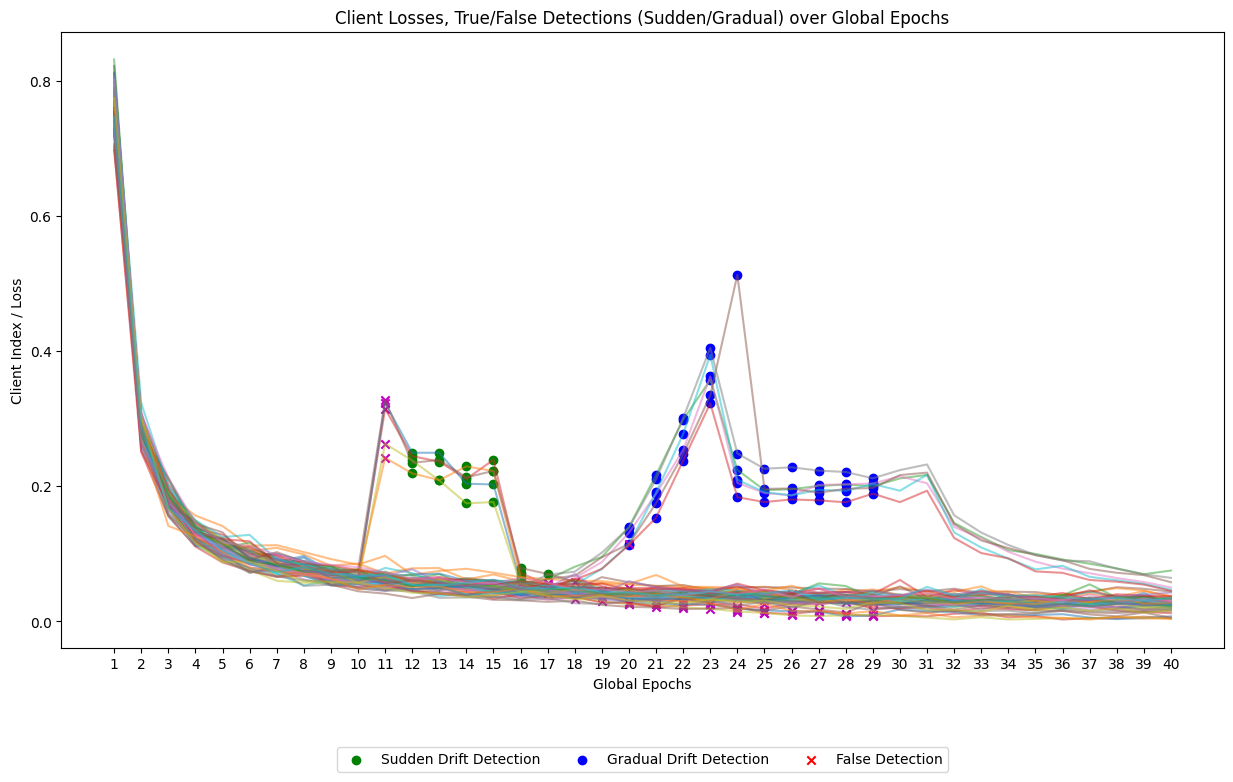

In [8]:
import matplotlib.pyplot as plt

# Initialize lists to store client losses, true detections, false detections, and detection types
client_losses = [[] for _ in range(60)]
true_detections = []
false_detections = []

# Read the contents of the text file
with open("/kaggle/input/log-txt/08042024_2055.txt", "r") as file:
    lines = file.readlines()

# Parse the lines and extract values
client_idx = -1
for line in lines:
    if "Training Client" in line:
        parts = line.split(" ")
        client_idx = int(parts[2].split("/")[0]) - 1
    elif line.startswith("Epoch 1/1"):
        loss = float(line.split(", Loss: ")[1].split(",")[0])
        client_losses[client_idx].append(loss/64)
    elif "True Drift Detected" in line or "False Drift Detected" in line:
        parts = line.split(", ")
        if len(parts) < 2:
            print(f"Skipping line due to unexpected format: {line.strip()}")
            continue
        epoch_info = parts[0].split(" ")
        global_epoch = int(epoch_info[2])
        client_info = parts[1].split(" ")
        client_idx = int(client_info[1].split(":")[0]) - 1
        drift_type = "Sudden" if "Sudden" in line else "Gradual"
        detection_type = "True" if "True Drift Detected" in line else "False"

        if detection_type == "True":
            true_detections.append((global_epoch, client_idx, drift_type))
        else:
            false_detections.append((global_epoch, client_idx, drift_type))

# Plotting all data in a single plot
plt.figure(figsize=(15, 8))

# Plot client losses
for i, losses in enumerate(client_losses):
    if len(losses) >= 1:  # Plot from the first epoch
        epochs = range(1, len(losses) + 1)
        plt.plot(epochs, losses, alpha=0.5)
        
#         # Annotate the client ID at the end of their respective lines
#         plt.text(epochs[-1], losses[-1], f'Client {i + 1}', fontsize=14, verticalalignment='center')

        # Plot true detections
        true_sudden_points = [(epoch, losses[epoch - 1]) for epoch, client, drift in true_detections if client == i and drift == "Sudden"]
        true_gradual_points = [(epoch, losses[epoch - 1]) for epoch, client, drift in true_detections if client == i and drift == "Gradual"]
        for epoch, loss in true_sudden_points:
            plt.scatter(epoch, loss, color='g', marker='o')
        for epoch, loss in true_gradual_points:
            plt.scatter(epoch, loss, color='b', marker='o')

        # Plot false detections
        false_sudden_points = [(epoch, losses[epoch - 1]) for epoch, client, drift in false_detections if client == i and drift == "Sudden"]
        false_gradual_points = [(epoch, losses[epoch - 1]) for epoch, client, drift in false_detections if client == i and drift == "Gradual"]
        for epoch, loss in false_sudden_points:
            plt.scatter(epoch, loss, color='r', marker='x')
        for epoch, loss in false_gradual_points:
            plt.scatter(epoch, loss, color='m', marker='x')

# Manually add the legend for sudden and gradual drifts
plt.scatter([], [], color='g', marker='o', label="Sudden Drift Detection")
plt.scatter([], [], color='b', marker='o', label="Gradual Drift Detection")
plt.scatter([], [], color='r', marker='x', label="False Detection")

plt.xlabel("Global Epochs")
plt.ylabel("Client Index / Loss")
plt.title("Client Losses, True/False Detections (Sudden/Gradual) over Global Epochs")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8)
plt.grid(False)
plt.xticks(range(1, 41))  # Start x-axis ticks from 1
plt.savefig("combined_plot.png")
plt.show()


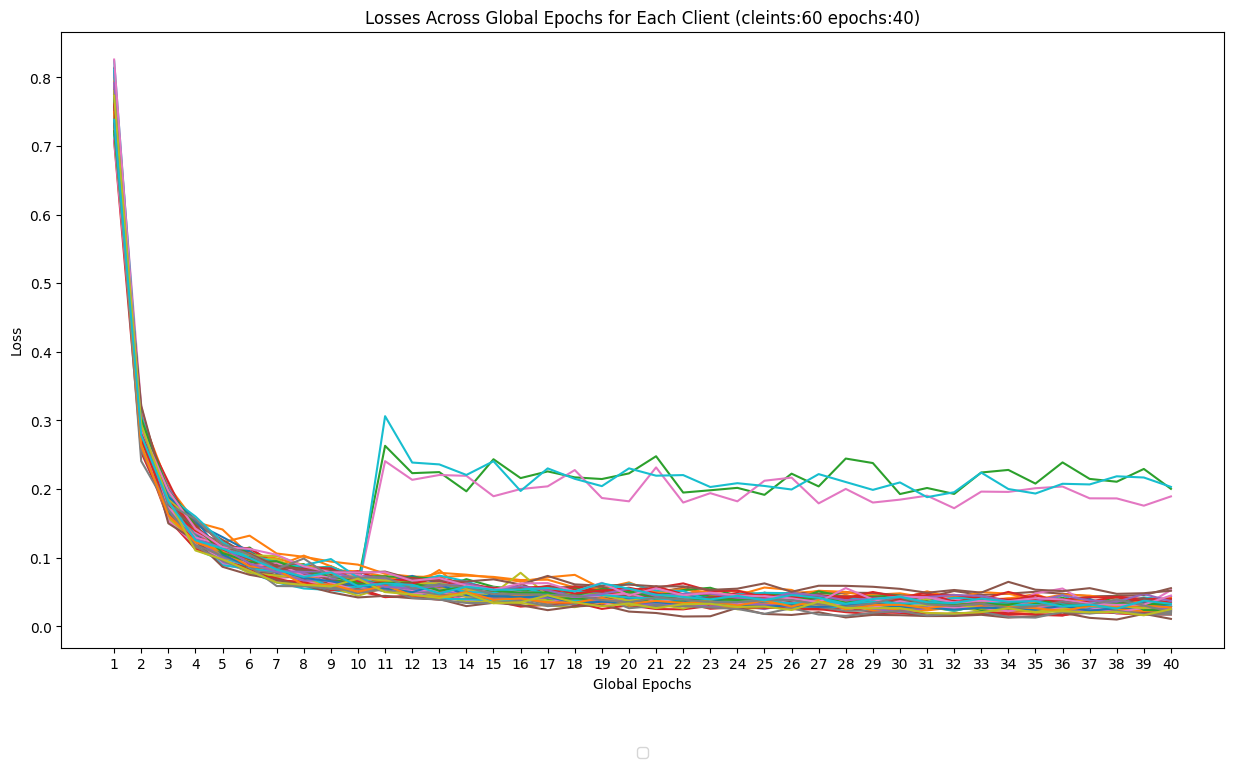

In [1]:
import matplotlib.pyplot as plt

# Initialize lists to store client losses
client_losses = [[] for _ in range(60)]

# Read the contents of the text file
# 10072024_1225 sudden 3,8
with open("/kaggle/input/log-txt/10072024_1225.txt", "r") as file:
    lines = file.readlines()

# Parse the lines and extract loss values for each client
for line in lines:
    if "Training Client" in line:
        parts = line.split(" ")
        client_idx = int(parts[2].split("/")[0]) - 1
    elif line.startswith("Epoch"):
        loss = float(line.split(", Loss: ")[1].split(",")[0])
        client_losses[client_idx].append(loss/64)

# Plotting
plt.figure(figsize=(15, 8))
for i, losses in enumerate(client_losses):
    if losses:  # Check if there are any losses recorded for this client
        plt.plot(range(1, len(losses) + 1), losses)

plt.xlabel("Global Epochs")
plt.ylabel("Loss")
plt.title("Losses Across Global Epochs for Each Client (cleints:60 epochs:40)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8)
plt.grid(False)
plt.xticks(range(1, max(len(losses) for losses in client_losses) + 1))  # Set xticks based on maximum epochs any client has
plt.savefig("file_name.png")
plt.show()


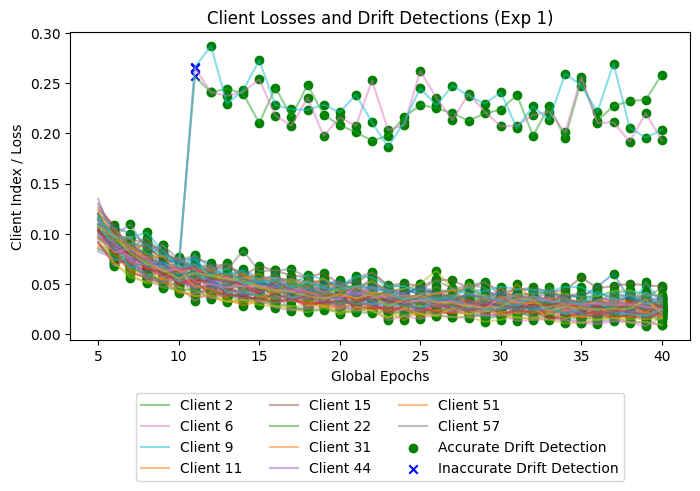

In [27]:
import matplotlib.pyplot as plt

# Initialize lists to store client losses and true detections
client_losses = [[] for _ in range(60)]
true_detections = []

# Read the contents of the text file
# 03072024.txt have mix drift file
with open("/kaggle/input/log-txt/sudden38_60_40.txt", "r") as file:
    lines = file.readlines()

# Parse the lines and extract values
client_idx = -1
for line in lines:
    if "Training Client" in line:
        parts = line.split(" ")
        client_idx = int(parts[2].split("/")[0]) - 1
    elif line.startswith("Epoch 1/1"):
        loss = float(line.split(", Loss: ")[1].split(",")[0])
        client_losses[client_idx].append(loss/64)
    elif "Drift detection is" in line:
        parts = line.split(", ")
        if len(parts) < 2:
            print(f"Skipping line due to unexpected format: {line.strip()}")
            continue
        epoch_info = parts[0].split(" ")
        global_epoch = int(epoch_info[2])
        client_info = parts[1].split(" ")
        client_idx = int(client_info[1].split(":")[0]) - 1
        drift_type = "not accurate" if "inaccurate" in line else "accurate"

        true_detections.append((global_epoch, client_idx, drift_type))

# Plotting all data in a single plot
plt.figure(figsize=(8, 4))
# c =[2,6,9]
# c = [2, 6, 9, 11, 15, 22, 31, 44 , 51, 57]

# Plot client losses
for i, losses in enumerate(client_losses):
    if len(losses) >= 5:
        epochs = range(5, len(losses) + 1)
        if i in c:
            plt.plot(epochs, losses[4:], alpha=0.5, label=f"Client {i}")
        else:
            plt.plot(epochs, losses[4:], alpha=0.5)
        
        # Plot true detections
        accurate_points = [(epoch, losses[epoch - 1]) for epoch, client, drift in true_detections if client == i and drift == "accurate"]
        not_accurate_points = [(epoch, losses[epoch - 1]) for epoch, client, drift in true_detections if client == i and drift == "not accurate"]
        for epoch, loss in accurate_points:
            plt.scatter(epoch, loss, color='g', marker='o')
        for epoch, loss in not_accurate_points:
            plt.scatter(epoch, loss, color='b', marker='x')

# Manually add the legend for accurate and not accurate drifts
plt.scatter([], [], color='g', marker='o', label="Accurate Drift Detection")
plt.scatter([], [], color='b', marker='x', label="Inaccurate Drift Detection")

plt.xlabel("Global Epochs")
plt.ylabel("Client Index / Loss")
plt.title("Client Losses and Drift Detections (Exp 1)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.grid(False)
plt.xticks(range(5, 41,5))  # Start x-axis ticks from 8
plt.savefig("sudden38_60_40.pdf",format="pdf", bbox_inches='tight')
plt.show()


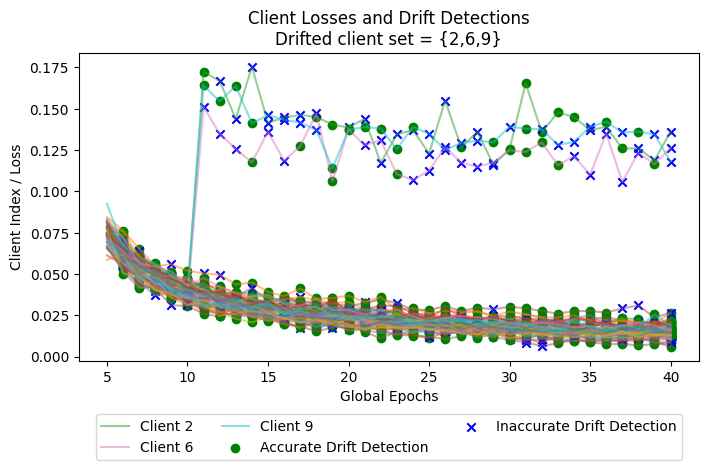

In [8]:
import matplotlib.pyplot as plt

# Initialize lists to store client losses and true detections
client_losses = [[] for _ in range(60)]
true_detections = []

# Read the contents of the text file
# 03072024.txt have mix drift file
with open("/kaggle/input/log-txt/shap_60_40.txt", "r") as file:
    lines = file.readlines()

# Parse the lines and extract values
client_idx = -1
for line in lines:
    if "Training Client" in line:
        parts = line.split(" ")
        client_idx = int(parts[2].split("/")[0]) - 1
    elif line.startswith("Epoch 1/1"):
        loss = float(line.split(", Loss: ")[1].split(",")[0])
        client_losses[client_idx].append(loss/64)
    elif "Drift detection is" in line:
        parts = line.split(", ")
        if len(parts) < 2:
            print(f"Skipping line due to unexpected format: {line.strip()}")
            continue
        epoch_info = parts[0].split(" ")
        global_epoch = int(epoch_info[2])
        client_info = parts[1].split(" ")
        client_idx = int(client_info[1].split(":")[0]) - 1
        drift_type = "not accurate" if "not accurate" in line else "accurate"

        true_detections.append((global_epoch, client_idx, drift_type))

# Plotting all data in a single plot
plt.figure(figsize=(8, 4))
c =[2,6,9]

# Plot client losses
for i, losses in enumerate(client_losses):
    if len(losses) >= 5:
        epochs = range(5, len(losses) + 1)
        if i in c:
            plt.plot(epochs, losses[4:], alpha=0.5, label=f"Client {i}")
        else:
            plt.plot(epochs, losses[4:], alpha=0.5)
        
        
        # Plot true detections
        accurate_points = [(epoch, losses[epoch - 1]) for epoch, client, drift in true_detections if client == i and drift == "accurate"]
        not_accurate_points = [(epoch, losses[epoch - 1]) for epoch, client, drift in true_detections if client == i and drift == "not accurate"]
        for epoch, loss in accurate_points:
            plt.scatter(epoch, loss, color='g', marker='o')
        for epoch, loss in not_accurate_points:
            plt.scatter(epoch, loss, color='b', marker='x')

# Manually add the legend for accurate and not accurate drifts
plt.scatter([], [], color='g', marker='o', label="Accurate Drift Detection")
plt.scatter([], [], color='b', marker='x', label="Inaccurate Drift Detection")

plt.xlabel("Global Epochs")
plt.ylabel("Client Index / Loss")
plt.title("Client Losses and Drift Detections\nDrifted client set = {2,6,9}")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.grid(False)
plt.xticks(range(5, 41,5))  # Start x-axis ticks from 8
plt.savefig("shap_60_40.pdf",format="pdf", bbox_inches='tight')
plt.show()


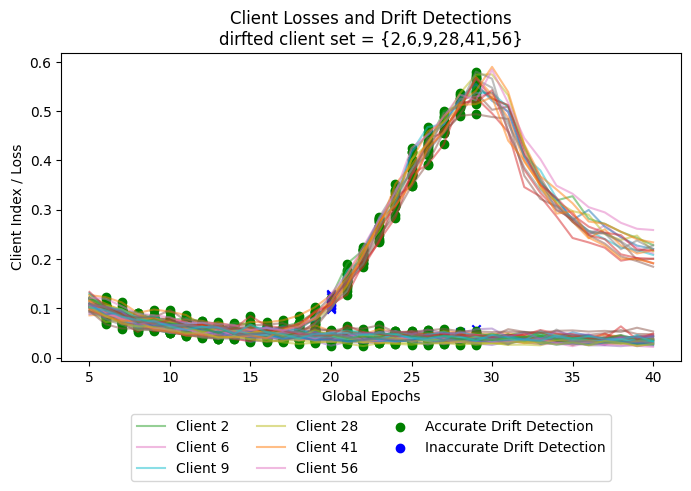

In [3]:
import matplotlib.pyplot as plt

# Initialize lists to store client losses and true detections
client_losses = [[] for _ in range(60)]
true_detections = []

# Read the contents of the text file
# 03072024.txt have mix drift file
with open("/kaggle/input/log-txt/gdrift_60_40_16.txt", "r") as file:
    lines = file.readlines()

# Parse the lines and extract values
client_idx = -1
for line in lines:
    if "Training Client" in line:
        parts = line.split(" ")
        client_idx = int(parts[2].split("/")[0]) - 1
    elif line.startswith("Epoch 1/1"):
        loss = float(line.split(", Loss: ")[1].split(",")[0])
        client_losses[client_idx].append(loss/64)
    elif "Drift detection is" in line:
        parts = line.split(", ")
        if len(parts) < 2:
            print(f"Skipping line due to unexpected format: {line.strip()}")
            continue
        epoch_info = parts[0].split(" ")
        global_epoch = int(epoch_info[2])
        client_info = parts[1].split(" ")
        client_idx = int(client_info[1].split(":")[0]) - 1
        drift_type = "not accurate" if "inaccurate" in line else "accurate"

        true_detections.append((global_epoch, client_idx, drift_type))

# Plotting all data in a single plot
plt.figure(figsize=(8, 4))
c = [2, 6, 9, 28, 41, 56]

# Plot client losses
for i, losses in enumerate(client_losses):
    if len(losses) >= 5:
        epochs = range(5, len(losses) + 1)
        if i in c:
            plt.plot(epochs, losses[4:], alpha=0.5, label=f"Client {i}")
        else:
            plt.plot(epochs, losses[4:], alpha=0.5)
        
        # Plot true detections
        accurate_points = [(epoch, losses[epoch - 1]) for epoch, client, drift in true_detections if client == i and drift == "accurate"]
        not_accurate_points = [(epoch, losses[epoch - 1]) for epoch, client, drift in true_detections if client == i and drift == "not accurate"]
        for epoch, loss in accurate_points:
            plt.scatter(epoch, loss, color='g', marker='o')
        for epoch, loss in not_accurate_points:
            plt.scatter(epoch, loss, color='b', marker='x')

# Manually add the legend for accurate and not accurate drifts
plt.scatter([], [], color='g', marker='o', label="Accurate Drift Detection")
plt.scatter([], [], color='b', marker='o', label="Inaccurate Drift Detection")

plt.xlabel("Global Epochs")
plt.ylabel("Client Index / Loss")
plt.title("Client Losses and Drift Detections\ndirfted client set = {2,6,9,28,41,56}")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.grid(False)
plt.xticks(range(5, 41,5))  # Start x-axis ticks from 8
plt.savefig("sudden38_60_40.pdf",format="pdf", bbox_inches='tight')
plt.show()


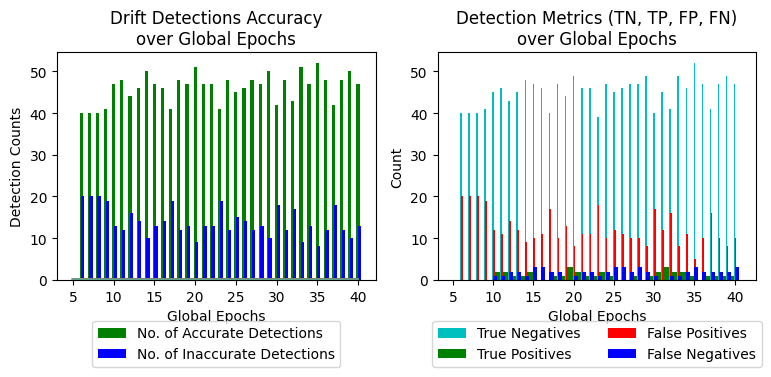

In [6]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Initialize lists to store client losses, true detections, and detection counts
client_losses = [[] for _ in range(60)]
true_detections = []

# Initialize dictionaries to store detection counts for each epoch
accurate_counts = defaultdict(int)
not_accurate_counts = defaultdict(int)

# Initialize dictionaries to store detection metrics
tn = defaultdict(int)
tp = defaultdict(int)
fp = defaultdict(int)
fn = defaultdict(int)

# Define ground truth conditions
ground_truth_clients = [2, 6, 9]
ground_truth_start_epoch = 10  # Drift starts at global_epoch >= 10 for clients 2, 6, 9

# Read the contents of the text file
with open("/kaggle/input/log-txt/shap_60_40.txt", "r") as file:
    lines = file.readlines()

# Parse the lines and extract values
client_idx = -1
for line in lines:
    if "Training Client" in line:
        parts = line.split(" ")
        client_idx = int(parts[2].split("/")[0]) - 1
    elif line.startswith("Epoch 1/1"):
        loss = float(line.split(", Loss: ")[1].split(",")[0])
        client_losses[client_idx].append(loss/64)
    elif "Drift detection is" in line:
        parts = line.split(", ")
        if len(parts) < 2:
            print(f"Skipping line due to unexpected format: {line.strip()}")
            continue
        epoch_info = parts[0].split(" ")
        global_epoch = int(epoch_info[2])
        client_info = parts[1].split(" ")
        client_idx = int(client_info[1].split(":")[0]) - 1
        drift_type = "not accurate" if "not accurate" in line else "accurate"

        true_detections.append((global_epoch, client_idx, drift_type))

        # Count accurate and not accurate detections
        if drift_type == "accurate":
            accurate_counts[global_epoch] += 1
        else:
            not_accurate_counts[global_epoch] += 1

# Calculate TN, TP, FP, FN
for epoch in range(5, max(accurate_counts.keys()) + 1):
    for client in range(60):
        # Drift should be detected if client is in ground truth clients and epoch >= 10
        in_ground_truth = ((client+0) in ground_truth_clients) and (epoch >= ground_truth_start_epoch)

        # Check if drift was detected (either accurate or not accurate)
        detected_accurate = any(e == epoch and c == client and d == "accurate" for e, c, d in true_detections)
        detected_not_accurate = any(e == epoch and c == client and d == "not accurate" for e, c, d in true_detections)

        if detected_accurate and in_ground_truth:
            tp[epoch] += 1
        elif detected_accurate and not in_ground_truth:
            tn[epoch] += 1
        elif detected_not_accurate and not in_ground_truth:
            fp[epoch] += 1
        elif detected_not_accurate and in_ground_truth:
            fn[epoch] += 1

# Plotting both graphs side by side
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot client losses and detection counts
for i, losses in enumerate(client_losses):
    if len(losses) >= 5:
        epochs = range(5, len(losses) + 1)
        axs[0].plot(epochs, losses[4:], alpha=0.5)
        
# Plot detection counts
epochs = range(5, max(accurate_counts.keys()) + 1)
accurate_vals = [accurate_counts[epoch] for epoch in epochs]
not_accurate_vals = [not_accurate_counts[epoch] for epoch in epochs]

axs[0].bar(epochs, accurate_vals, color='g', width=0.4, align='center', label='No. of Accurate Detections')
axs[0].bar(epochs, not_accurate_vals, color='b', width=0.4, align='edge', label='No. of Inaccurate Detections')

axs[0].set_xlabel("Global Epochs")
axs[0].set_ylabel("Detection Counts")
axs[0].set_title("Drift Detections Accuracy\nover Global Epochs")
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1)
axs[0].grid(False)
axs[0].set_xticks(range(5, 41, 5))  # Start x-axis ticks from 5

# Plot true negatives, true positives, false positives, false negatives
tn_vals = [tn[epoch] for epoch in epochs]
tp_vals = [tp[epoch] for epoch in epochs]
fp_vals = [fp[epoch] for epoch in epochs]
fn_vals = [fn[epoch] for epoch in epochs]

axs[1].bar(epochs, tn_vals, color='c', width=0.2, align='center', label='True Negatives')
axs[1].bar(epochs, tp_vals, color='g', width=0.9, align='edge', label='True Positives')
axs[1].bar(epochs, fp_vals, color='r', width=0.2, align='edge', label='False Positives')
axs[1].bar(epochs, fn_vals, color='b', width=0.5, align='edge', label='False Negatives')

axs[1].set_xlabel("Global Epochs")
axs[1].set_ylabel("Count")
axs[1].set_title("Detection Metrics (TN, TP, FP, FN)\nover Global Epochs")
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
axs[1].grid(False)
axs[1].set_xticks(range(5, 41, 5))  # Start x-axis ticks from 5

plt.tight_layout()
plt.savefig("shap_breakdown.pdf", format="pdf", bbox_inches='tight')
plt.show()


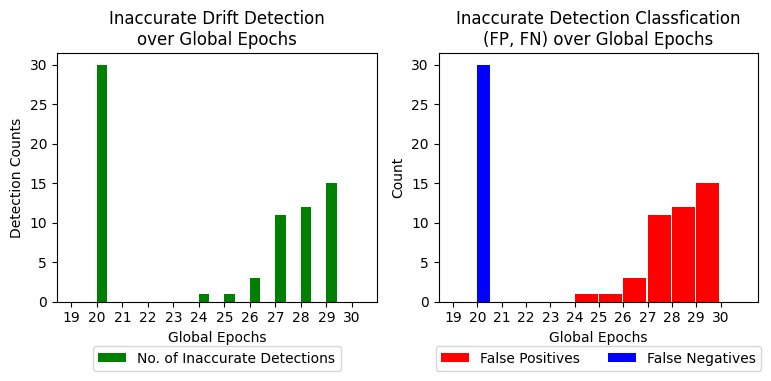

In [99]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Initialize lists to store client losses, true detections, and detection counts
client_losses = [[] for _ in range(60)]
true_detections = []

# Initialize dictionaries to store detection counts for each epoch
accurate_counts = defaultdict(int)
not_accurate_counts = defaultdict(int)

# Initialize dictionaries to store detection metrics
tn = defaultdict(int)
tp = defaultdict(int)
fp = defaultdict(int)
fn = defaultdict(int)

# Define ground truth conditions
# ground_truth_clients = [12, 30, 31, 0, 32, 20, 53, 15, 5, 13, 42, 10, 55, 35, 41, 48, 58, 40, 38, 9, 21, 14, 24, 43, 6, 57, 37, 4, 46, 47, 50, 11, 34, 59, 2, 51, 1, 23, 28, 56, 19, 16]
ground_truth_clients = [6, 50, 20, 5, 37, 42, 47, 13, 28, 15, 57, 10, 9, 31, 2, 41, 35, 1, 23, 58, 38, 46, 21, 48, 24, 43, 32, 4, 51, 56]

# ground_truth_clients = [2, 6, 9, 10, 13, 15, 21, 23, 28, 35, 37, 41, 43, 47, 51, 56]
# ground_truth_clients = [2, 6, 9, 28, 41, 56]
# ground_truth_start_epoch = range(10,30)  # Drift starts at global_epoch >= 10 for clients 2, 6, 9

# Read the contents of the text file
with open("/kaggle/input/log-txt/gdrift_60_40_30.txt", "r") as file:
    lines = file.readlines()

# Parse the lines and extract values
client_idx = -1
for line in lines:
    if "Training Client" in line:
        parts = line.split(" ")
        client_idx = int(parts[2].split("/")[0]) - 1
    elif line.startswith("Epoch 1/1"):
        loss = float(line.split(", Loss: ")[1].split(",")[0])
        client_losses[client_idx].append(loss/64)
    elif "Drift detection is" in line:
        parts = line.split(", ")
#         if len(parts) < 2:
#             print(f"Skipping line due to unexpected format: {line.strip()}")
#             continue
        epoch_info = parts[0].split(" ")
        global_epoch = int(epoch_info[2])
        client_info = parts[1].split(" ")
        client_idx = int(client_info[1].split(":")[0]) - 1
        drift_type = "not accurate" if "inaccurate" in line else "accurate"

        true_detections.append((global_epoch, client_idx, drift_type))

        # Count accurate and not accurate detections
        if drift_type == "accurate":
            accurate_counts[global_epoch] += 1
        else:
            not_accurate_counts[global_epoch] += 1

            
            
# Calculate TN, TP, FP, FN
for epoch in range(5, 40):
    for client in range(60):
        # Drift should be detected if client is in ground truth clients and epoch >= 10
        in_ground_truth = ((client+0) in ground_truth_clients) and (19 <= epoch <= 29)

        # Check if drift was detected (either accurate or not accurate)
        detected_accurate = any(e == epoch and c == client and d == "accurate" for e, c, d in true_detections)
        detected_not_accurate = any(e == epoch and c == client and d == "not accurate" for e, c, d in true_detections)

        if detected_accurate and in_ground_truth:
            tp[epoch] += 1
        elif detected_accurate and not in_ground_truth:
            tn[epoch] += 1
        elif detected_not_accurate and not in_ground_truth:
            fp[epoch] += 1
        elif detected_not_accurate and in_ground_truth:
            fn[epoch] += 1

# Plotting both graphs side by side
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot client losses and detection counts
for i, losses in enumerate(client_losses):
    if (len(losses) >= 19) and (len(losses) <= 31):
        epochs = range(19, len(losses) + 1)
        axs[0].plot(epochs, losses[18:], alpha=0.5)
        
# Plot detection counts
epochs = range(19, 31)
accurate_vals = [accurate_counts[epoch] for epoch in epochs]
not_accurate_vals = [not_accurate_counts[epoch] for epoch in epochs]

# axs[0].bar(epochs, accurate_vals, color='g', width=0.4, align='center', label='No. of Accurate Detections')
axs[0].bar(epochs, not_accurate_vals, color='g', width=0.4, align='edge', label='No. of Inaccurate Detections')

axs[0].set_xlabel("Global Epochs")
axs[0].set_ylabel("Detection Counts")
axs[0].set_title("Inaccurate Drift Detection\nover Global Epochs")
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1)
axs[0].grid(False)
axs[0].set_xticks(range(19, 31, 1))  # Start x-axis ticks from 5

# Plot true negatives, true positives, false positives, false negatives
tn_vals = [tn[epoch] for epoch in epochs]
tp_vals = [tp[epoch] for epoch in epochs]
fp_vals = [fp[epoch] for epoch in epochs]
fn_vals = [fn[epoch] for epoch in epochs]

# axs[1].bar(epochs, tn_vals, color='c', width=0.2, align='center', label='True Negatives')
# axs[1].bar(epochs, tp_vals, color='g', width=0.5, align='edge', label='True Positives')
axs[1].bar(epochs, fp_vals, color='r', width=0.7+0.25, align='edge', label='False Positives')
axs[1].bar(epochs, fn_vals, color='b', width=0.5, align='edge', label='False Negatives')


axs[1].set_xlabel("Global Epochs")
axs[1].set_ylabel("Count")
axs[1].set_title("Inaccurate Detection Classfication\n(FP, FN) over Global Epochs")
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
axs[1].grid(False)
axs[1].set_xticks(range(19, 31, 1))  # Start x-axis ticks from 5

plt.tight_layout()
plt.savefig("gdrift_60_40_30.pdf", format="pdf", bbox_inches='tight')
plt.show()


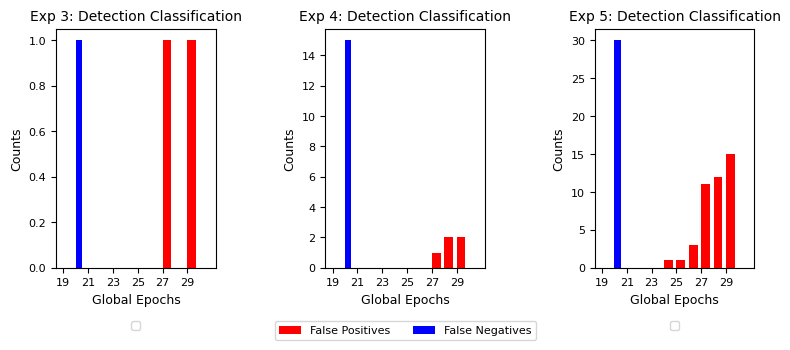

In [41]:
import matplotlib.pyplot as plt
from collections import defaultdict

def parse_file(file_path):
    client_losses = [[] for _ in range(60)]
    true_detections = []
    accurate_counts = defaultdict(int)
    not_accurate_counts = defaultdict(int)
    tn = defaultdict(int)
    tp = defaultdict(int)
    fp = defaultdict(int)
    fn = defaultdict(int)

    if 'gdrift_60_40_30' in file_path:
        ground_truth_clients = [6, 50, 20, 5, 37, 42, 47, 13, 28, 15, 57, 10, 9, 31, 2, 41, 35, 1, 23, 58, 38, 46, 21, 48, 24, 43, 32, 4, 51, 56]
        
    if 'gdrift_60_40_16' in file_path:
        ground_truth_clients = [2, 6, 9, 10, 13, 15, 21, 23, 28, 35, 37, 41, 43, 47, 51, 56]
        
    if 'gdrift_60_40_6' in file_path:
        ground_truth_clients = [2, 6, 9, 28, 41, 56]

    with open(file_path, "r") as file:
        lines = file.readlines()

    client_idx = -1
    for line in lines:
        if "Training Client" in line:
            parts = line.split(" ")
            client_idx = int(parts[2].split("/")[0]) - 1
        elif line.startswith("Epoch 1/1"):
            loss = float(line.split(", Loss: ")[1].split(",")[0])
            client_losses[client_idx].append(loss/64)
        elif "Drift detection is" in line:
            parts = line.split(", ")
            epoch_info = parts[0].split(" ")
            global_epoch = int(epoch_info[2])
            client_info = parts[1].split(" ")
            client_idx = int(client_info[1].split(":")[0]) - 1
            drift_type = "not accurate" if "inaccurate" in line else "accurate"
            true_detections.append((global_epoch, client_idx, drift_type))
            if drift_type == "accurate":
                accurate_counts[global_epoch] += 1
            else:
                not_accurate_counts[global_epoch] += 1

    for epoch in range(5, 40):
        for client in range(60):
            in_ground_truth = ((client+0) in ground_truth_clients) and (19 <= epoch <= 29)
            detected_accurate = any(e == epoch and c == client and d == "accurate" for e, c, d in true_detections)
            detected_not_accurate = any(e == epoch and c == client and d == "not accurate" for e, c, d in true_detections)

            if detected_accurate and in_ground_truth:
                tp[epoch] += 1
            elif detected_accurate and not in_ground_truth:
                tn[epoch] += 1
            elif detected_not_accurate and not in_ground_truth:
                fp[epoch] += 1
            elif detected_not_accurate and in_ground_truth:
                fn[epoch] += 1

    return client_losses, accurate_counts, not_accurate_counts, tn, tp, fp, fn

# List of input files
input_files = [
    "/kaggle/input/log-txt/gdrift_60_40_6.txt",
    "/kaggle/input/log-txt/gdrift_60_40_16.txt",
    "/kaggle/input/log-txt/gdrift_60_40_30.txt"
]


# Plotting the subplots
fig, axs = plt.subplots(1, 3, figsize=(8, 4))

for i, file in enumerate(input_files):
    client_losses, accurate_counts, not_accurate_counts, tn, tp, fp, fn = parse_file(file)

    # Plot client losses and detection counts
    for j, losses in enumerate(client_losses):
        if len(losses) >= 19 and len(losses) <= 31:
            epochs = range(19, len(losses) + 1)
            axs[i].plot(epochs, losses[18:], alpha=0.5)

    epochs = range(19, 31)
    accurate_vals = [accurate_counts[epoch] for epoch in epochs]
    not_accurate_vals = [not_accurate_counts[epoch] for epoch in epochs]

    

    tn_vals = [tn[epoch] for epoch in epochs]
    tp_vals = [tp[epoch] for epoch in epochs]
    fp_vals = [fp[epoch] for epoch in epochs]
    fn_vals = [fn[epoch] for epoch in epochs]
    
    
    if i==1:
        axs[i].bar(epochs, fp_vals, color='r', width=0.7, align='edge', label='False Positives')
        axs[i].bar(epochs, fn_vals, color='b', width=0.5, align='edge', label='False Negatives')
    else:
        axs[i].bar(epochs, fp_vals, color='r', width=0.7, align='edge')
        axs[i].bar(epochs, fn_vals, color='b', width=0.5, align='edge')


    axs[i].set_xlabel("Global Epochs", fontsize=9)
    axs[i].set_ylabel("Counts", fontsize=9)
    axs[i].set_title(f"Exp {i+3}: Detection Classification", fontsize=10)
    axs[i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, fontsize=8)
    axs[i].grid(False)
    axs[i].set_xticks(range(19, 31, 2))
    axs[i].tick_params(axis='both', labelsize=8)
    


plt.tight_layout(pad=2.0)
plt.savefig("subplots_output_small.pdf", format="pdf", bbox_inches='tight')
plt.show()


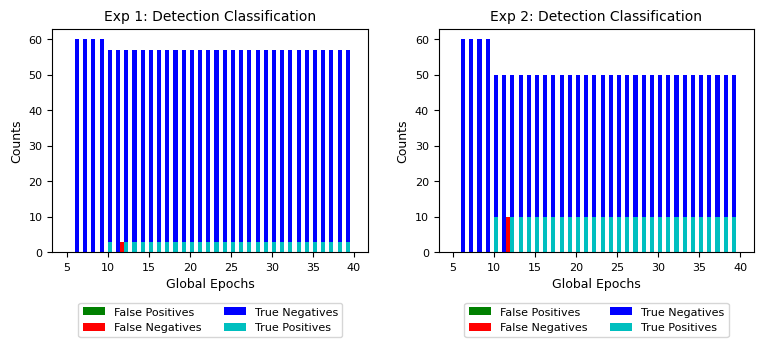

In [4]:
import matplotlib.pyplot as plt
from collections import defaultdict

def parse_file(file_path):
    client_losses = [[] for _ in range(60)]
    true_detections = []
    accurate_counts = defaultdict(int)
    not_accurate_counts = defaultdict(int)
    tn = defaultdict(int)
    tp = defaultdict(int)
    fp = defaultdict(int)
    fn = defaultdict(int)

    if 'test_sudden3856' in file_path:
        ground_truth_clients = [2, 6, 9, 11, 15, 22, 31, 44 , 51, 57]
        
    else:
        ground_truth_clients = [2, 6, 9]
        

    with open(file_path, "r") as file:
        lines = file.readlines()

    client_idx = -1
    for line in lines:
        if "Training Client" in line:
            parts = line.split(" ")
            client_idx = int(parts[2].split("/")[0]) - 1
        elif line.startswith("Epoch 1/1"):
            loss = float(line.split(", Loss: ")[1].split(",")[0])
            client_losses[client_idx].append(loss/64)
        elif "Drift detection is" in line:
            parts = line.split(", ")
            epoch_info = parts[0].split(" ")
            global_epoch = int(epoch_info[2])
            client_info = parts[1].split(" ")
            client_idx = int(client_info[1].split(":")[0]) - 1
            drift_type = "not accurate" if "inaccurate" in line else "accurate"
            true_detections.append((global_epoch, client_idx, drift_type))
            if drift_type == "accurate":
                accurate_counts[global_epoch] += 1
            else:
                not_accurate_counts[global_epoch] += 1

    for epoch in range(5, 40):
        for client in range(60):
            in_ground_truth = ((client+0) in ground_truth_clients) and (epoch >= 10)
            detected_accurate = any(e == epoch and c == client and d == "accurate" for e, c, d in true_detections)
            detected_not_accurate = any(e == epoch and c == client and d == "not accurate" for e, c, d in true_detections)

            if detected_accurate and in_ground_truth:
                tp[epoch] += 1
            elif detected_accurate and not in_ground_truth:
                tn[epoch] += 1
            elif detected_not_accurate and not in_ground_truth:
                fp[epoch] += 1
            elif detected_not_accurate and in_ground_truth:
                fn[epoch] += 1

    return client_losses, accurate_counts, not_accurate_counts, tn, tp, fp, fn

# List of input files
input_files = [
    "/kaggle/input/log-txt/sudden38_60_40.txt",
    "/kaggle/input/log-txt/test_sudden3856.txt"
]


# Plotting the subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

for i, file in enumerate(input_files):
    client_losses, accurate_counts, not_accurate_counts, tn, tp, fp, fn = parse_file(file)

    # Plot client losses and detection counts
#     for j, losses in enumerate(client_losses):
#         if len(losses) >= 10:
#             epochs = range(10, len(losses) + 1)
#             axs[i].plot(epochs, losses[9:], alpha=0.5)

    epochs = range(5, 40)
    accurate_vals = [accurate_counts[epoch] for epoch in epochs]
    not_accurate_vals = [not_accurate_counts[epoch] for epoch in epochs]

    

    tn_vals = [tn[epoch] for epoch in epochs]
    tp_vals = [tp[epoch] for epoch in epochs]
    fp_vals = [fp[epoch] for epoch in epochs]
    fn_vals = [fn[epoch] for epoch in epochs]
    
    

    axs[i].bar(epochs, fp_vals, color='g', width=0.5, align='edge', label='False Positives')
    axs[i].bar(epochs, fn_vals, color='r', width=1, align='edge', label='False Negatives')
    axs[i].bar(epochs, tn_vals, color='b', width=0.5, align='edge', label='True Negatives')
    axs[i].bar(epochs, tp_vals, color='c', width=0.5, align='edge', label='True Positives')

    


    axs[i].set_xlabel("Global Epochs", fontsize=9)
    axs[i].set_ylabel("Counts", fontsize=9)
    axs[i].set_title(f"Exp {i+1}: Detection Classification", fontsize=10)
    axs[i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, fontsize=8)
    axs[i].grid(False)
    axs[i].set_xticks(range(5, 41, 5))
    axs[i].tick_params(axis='both', labelsize=8)
    


plt.tight_layout(pad=2.0)
plt.savefig("subplots_output_small.pdf", format="pdf", bbox_inches='tight')
plt.show()


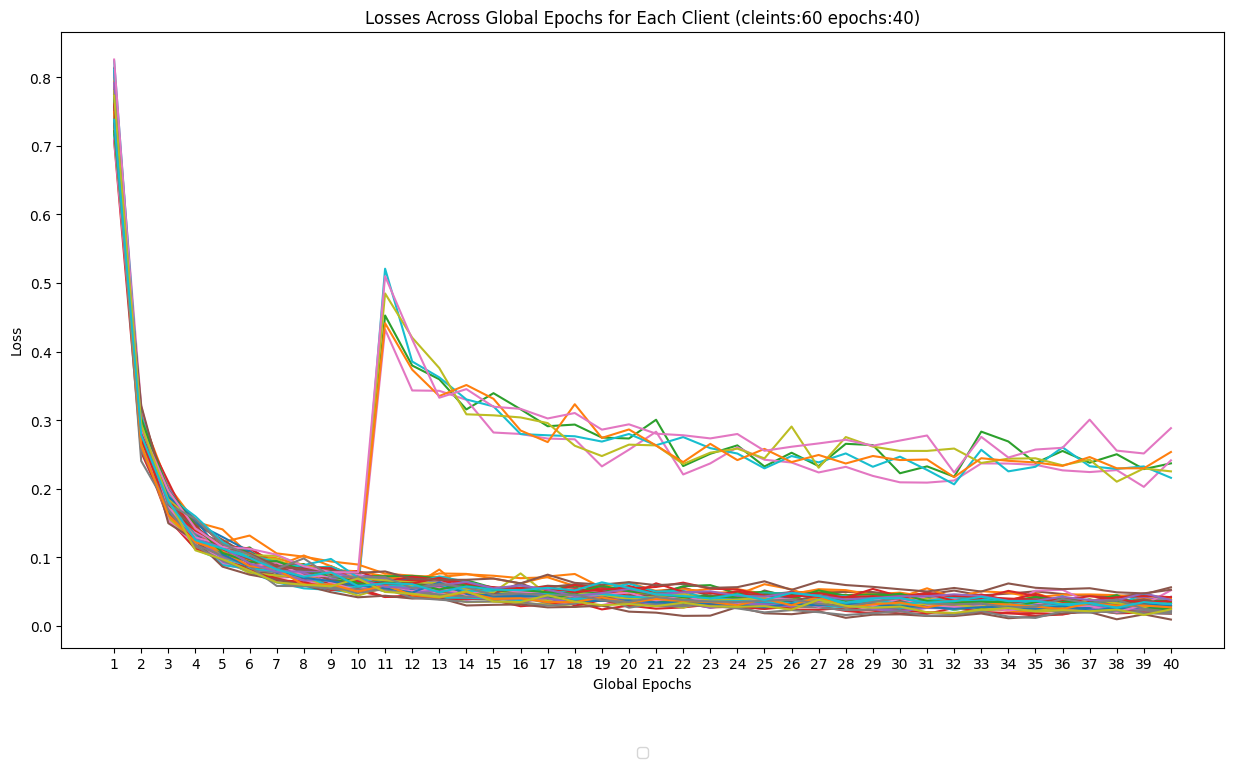

In [18]:
import matplotlib.pyplot as plt

# Initialize lists to store client losses
client_losses = [[] for _ in range(60)]

# Read the contents of the text file 11072024
with open("/kaggle/input/log-txt/sudden3856_60_40 .txt", "r") as file:
    lines = file.readlines()

# Parse the lines and extract loss values for each client
for line in lines:
    if "Training Client" in line:
        parts = line.split(" ")
        client_idx = int(parts[2].split("/")[0]) - 1
    elif line.startswith("Epoch"):
        loss = float(line.split(", Loss: ")[1].split(",")[0])
        client_losses[client_idx].append(loss/64)

# Plotting
plt.figure(figsize=(15, 8))
for i, losses in enumerate(client_losses):
    if losses:  # Check if there are any losses recorded for this client
        plt.plot(range(1, len(losses) + 1), losses)




plt.xlabel("Global Epochs")
plt.ylabel("Loss")
plt.title("Losses Across Global Epochs for Each Client (cleints:60 epochs:40)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8)
plt.grid(False)
plt.xticks(range(1, max(len(losses) for losses in client_losses) + 1))  # Set xticks based on maximum epochs any client has
plt.savefig("file_name.png")
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Initialize lists to store client losses, true detections, false detections, and detection types
client_losses = [[] for _ in range(60)]
true_detections = []
false_detections = []

# Read the contents of the text file
# 03072024.txt, 21072024.txt have mix drift file
with open("/kaggle/input/log-txt/21072024.txt", "r") as file:
    lines = file.readlines()

# Parse the lines and extract values
client_idx = -1
for line in lines:
    if "Training Client" in line:
        parts = line.split(" ")
        client_idx = int(parts[2].split("/")[0]) - 1
    elif line.startswith("Epoch 1/1"):
        loss = float(line.split(", Loss: ")[1].split(",")[0])
        client_losses[client_idx].append(loss/64)
    elif "True Drift Detected" in line or "False Drift Detected" in line:
        parts = line.split(", ")
        if len(parts) < 2:
            print(f"Skipping line due to unexpected format: {line.strip()}")
            continue
        epoch_info = parts[0].split(" ")
        global_epoch = int(epoch_info[2])
        client_info = parts[1].split(" ")
        client_idx = int(client_info[1].split(":")[0]) - 1
        drift_type = "Sudden" if "Sudden" in line else "Gradual"
        detection_type = "True" if "True Drift Detected" in line else "False"

        if detection_type == "True":
            true_detections.append((global_epoch, client_idx, drift_type))
        else:
            false_detections.append((global_epoch, client_idx, drift_type))

# Plotting all data in a single plot
plt.figure(figsize=(8, 4))
c = [2, 6, 9,13,15,27]
d = [ 41, 55]

# Plot client losses
for i, losses in enumerate(client_losses):
    if len(losses) >= 8:
        epochs = range(8, len(losses) + 1)
        plt.plot(epochs, losses[7:], alpha=0.5)
        
        # Annotate the client ID at the maximum loss value (or the last value)
        if i in c and len(losses) >= 40:
            plt.plot(epochs, losses[7:], alpha=0.5, label=f"Client {i}")
            plt.text(40, losses[23], f'Client {i}', fontsize=5, verticalalignment='bottom', horizontalalignment='center')
        if i in d and len(losses) >= 40:
            plt.plot(epochs, losses[7:], alpha=0.5, label=f"Client {i}")
            plt.text(40, losses[30], f'Client {i}', fontsize=5, verticalalignment='bottom', horizontalalignment='center')
            
        # Plot true detections
        true_sudden_points = [(epoch, losses[epoch - 1]) for epoch, client, drift in true_detections if client == i and drift == "Sudden"]
        true_gradual_points = [(epoch, losses[epoch - 1]) for epoch, client, drift in true_detections if client == i and drift == "Gradual"]
        for epoch, loss in true_sudden_points:
            plt.scatter(epoch, loss, color='g', marker='o')
        for epoch, loss in true_gradual_points:
            plt.scatter(epoch, loss, color='b', marker='o')

        # Plot false detections
        false_sudden_points = [(epoch, losses[epoch - 1]) for epoch, client, drift in false_detections if client == i and drift == "Sudden"]
        false_gradual_points = [(epoch, losses[epoch - 1]) for epoch, client, drift in false_detections if client == i and drift == "Gradual"]
        for epoch, loss in false_sudden_points:
            plt.scatter(epoch, loss, color='r', marker='x')
        for epoch, loss in false_gradual_points:
            plt.scatter(epoch, loss, color='m', marker='x')

# Manually add the legend for sudden and gradual drifts
plt.scatter([], [], color='g', marker='o', label="Sudden Drift Detection")
plt.scatter([], [], color='b', marker='o', label="Gradual Drift Detection")
plt.scatter([], [], color='r', marker='x', label="False Detection")

plt.xlabel("Global Epochs")
plt.ylabel("Client Index / Loss")
plt.title("Client Losses, True/False Detections (Sudden/Gradual) over Global Epochs")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.grid(False)
plt.xticks(range(8, 41,2))  # Start x-axis ticks from 8
plt.savefig("mix_2.pdf", format="pdf", bbox_inches='tight')
plt.show()


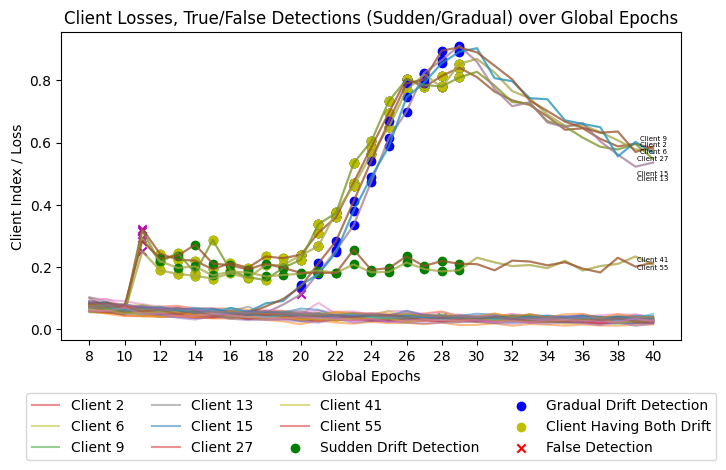

In [7]:
import matplotlib.pyplot as plt

# Initialize lists to store client losses, true detections, false detections, and detection types
client_losses = [[] for _ in range(60)]
true_detections = []
false_detections = []

# Read the contents of the text file
with open("/kaggle/input/log-txt/21072024.txt", "r") as file:
    lines = file.readlines()

# Parse the lines and extract values
client_idx = -1
for line in lines:
    if "Training Client" in line:
        parts = line.split(" ")
        client_idx = int(parts[2].split("/")[0]) - 1
    elif line.startswith("Epoch 1/1"):
        loss = float(line.split(", Loss: ")[1].split(",")[0])
        client_losses[client_idx].append(loss/64)
    elif "True Drift Detected" in line or "False Drift Detected" in line:
        parts = line.split(", ")
        if len(parts) < 2:
            print(f"Skipping line due to unexpected format: {line.strip()}")
            continue
        epoch_info = parts[0].split(" ")
        global_epoch = int(epoch_info[2])
        client_info = parts[1].split(" ")
        client_idx = int(client_info[1].split(":")[0]) - 1
        drift_type = "Sudden" if "Sudden" in line else "Gradual"
        detection_type = "True" if "True Drift Detected" in line else "False"

        if detection_type == "True":
            true_detections.append((global_epoch, client_idx, drift_type))
        else:
            false_detections.append((global_epoch, client_idx, drift_type))
            
# Identify clients with both true sudden and gradual drifts
clients_with_both_drifts = set()
for epoch, client, drift in true_detections:
    if drift == "Sudden" and any(d[1] == client and d[2] == "Gradual" for d in true_detections):
        clients_with_both_drifts.add(client)

# Plotting all data in a single plot
plt.figure(figsize=(8, 4))
c = [2, 6, 9,13,15,27]
d = [41, 55]

# Plot client losses
for i, losses in enumerate(client_losses):
    if len(losses) >= 8:
        epochs = range(8, len(losses) + 1)
        plt.plot(epochs, losses[7:], alpha=0.5)
        
        # Annotate the client ID at the maximum loss value (or the last value)
        if i in c and len(losses) >= 40:
            plt.plot(epochs, losses[7:], alpha=0.5, label=f"Client {i}")
            plt.text(40, losses[23], f'Client {i}', fontsize=5, verticalalignment='bottom', horizontalalignment='center')
        if i in d and len(losses) >= 40:
            plt.plot(epochs, losses[7:], alpha=0.5, label=f"Client {i}")
            plt.text(40, losses[30], f'Client {i}', fontsize=5, verticalalignment='bottom', horizontalalignment='center')
            
        
        # Plot true detections
        true_sudden_points = [(epoch, losses[epoch - 1]) for epoch, client, drift in true_detections if client == i and drift == "Sudden"]
        true_gradual_points = [(epoch, losses[epoch - 1]) for epoch, client, drift in true_detections if client == i and drift == "Gradual"]
        both_drift_points = [(epoch, losses[epoch - 1]) for epoch, client, drift in true_detections if client == i and client in clients_with_both_drifts]
        for epoch, loss in true_sudden_points:
            plt.scatter(epoch, loss, color='g', marker='o')
        for epoch, loss in true_gradual_points:
            plt.scatter(epoch, loss, color='b', marker='o')
        for epoch, loss in both_drift_points:
            plt.scatter(epoch, loss, color='y', marker='o')
        

        
        
        # Plot false detections
        false_sudden_points = [(epoch, losses[epoch - 1]) for epoch, client, drift in false_detections if client == i and drift == "Sudden"]
        false_gradual_points = [(epoch, losses[epoch - 1]) for epoch, client, drift in false_detections if client == i and drift == "Gradual"]
        for epoch, loss in false_sudden_points:
            plt.scatter(epoch, loss, color='r', marker='x')
        for epoch, loss in false_gradual_points:
            plt.scatter(epoch, loss, color='m', marker='x')

# Manually add the legend for sudden and gradual drifts
plt.scatter([], [], color='g', marker='o', label="Sudden Drift Detection")
plt.scatter([], [], color='b', marker='o', label="Gradual Drift Detection")
plt.scatter([], [], color='y', marker='o', label="Client Having Both Drift")
plt.scatter([], [], color='r', marker='x', label="False Detection")

plt.xlabel("Global Epochs")
plt.ylabel("Client Index / Loss")
plt.title("Client Losses, True/False Detections (Sudden/Gradual) over Global Epochs")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.grid(False)
plt.xticks(range(8, 41,2))  # Start x-axis ticks from 8
plt.savefig("mix_2.pdf", format="pdf", bbox_inches='tight')
plt.show()


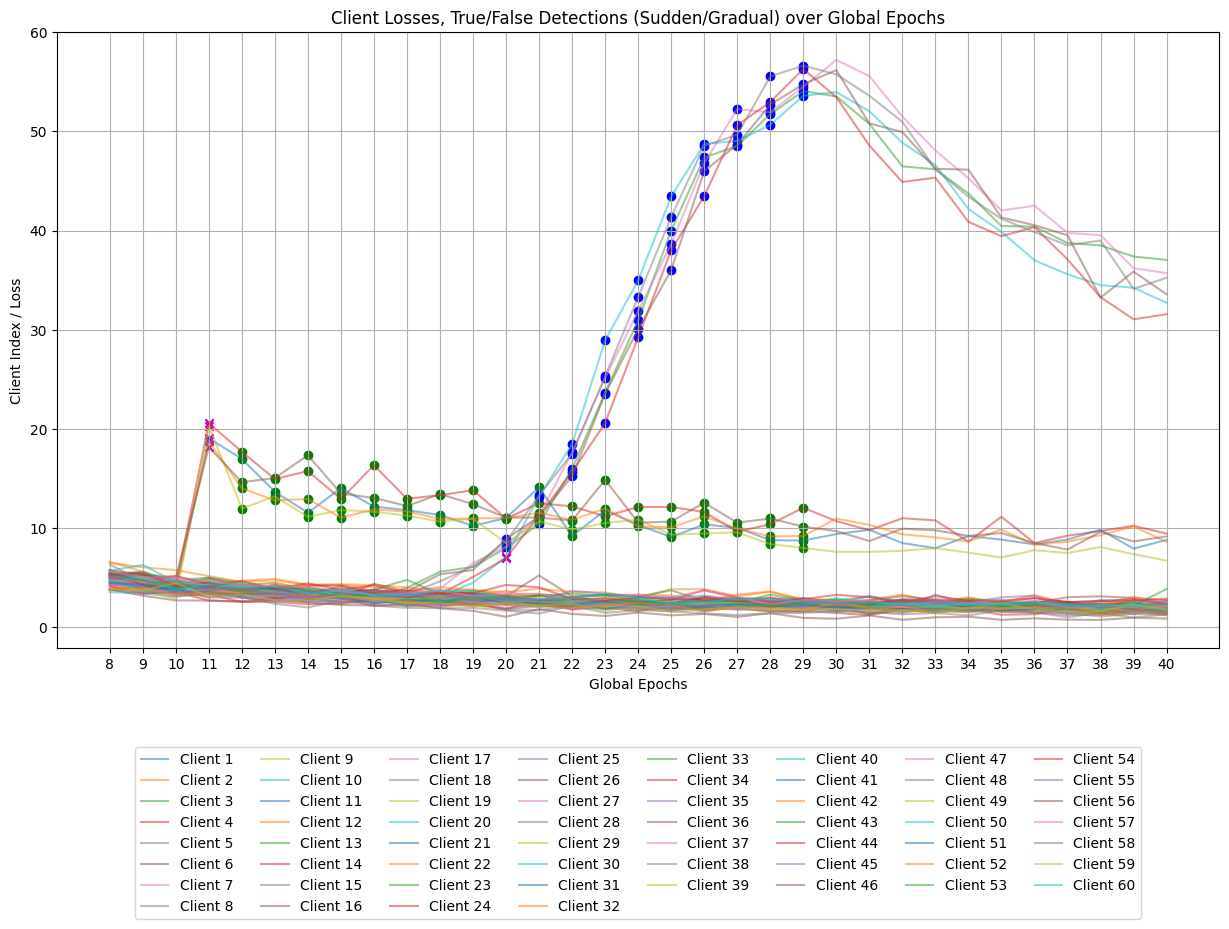

In [3]:
import matplotlib.pyplot as plt

# Initialize lists to store client losses, true detections, false detections, and detection types
client_losses = [[] for _ in range(60)]
true_detections = []
false_detections = []

# Read the contents of the text file
with open("/kaggle/input/log-txt/03072024.txt", "r") as file:
    lines = file.readlines()

# Parse the lines and extract values
client_idx = -1
for line in lines:
    if "Training Client" in line:
        parts = line.split(" ")
        client_idx = int(parts[2].split("/")[0]) - 1
    elif line.startswith("Epoch 1/1"):
        loss = float(line.split(", Loss: ")[1].split(",")[0])
        client_losses[client_idx].append(loss)
    elif "True Drift Detected" in line or "False Drift Detected" in line:
        parts = line.split(", ")
        if len(parts) < 2:
            print(f"Skipping line due to unexpected format: {line.strip()}")
            continue
        epoch_info = parts[0].split(" ")
        global_epoch = int(epoch_info[2])
        client_info = parts[1].split(" ")
        client_idx = int(client_info[1].split(":")[0]) - 1
        drift_type = "Sudden" if "Sudden" in line else "Gradual"
        detection_type = "True" if "True Drift Detected" in line else "False"

        if detection_type == "True":
            true_detections.append((global_epoch, client_idx, drift_type))
        else:
            false_detections.append((global_epoch, client_idx, drift_type))

# Plotting all data in a single plot
plt.figure(figsize=(15, 8))

# Plot client losses and detection points
for i, losses in enumerate(client_losses):
    if len(losses) >= 8:
        epochs = range(8, len(losses) + 1)
        plt.plot(epochs, losses[7:], label=f"Client {i+1}", alpha=0.5)
        
        # Plot true detections
        true_sudden_points = [(epoch, losses[epoch - 1]) for epoch, client, drift in true_detections if client == i and drift == "Sudden"]
        true_gradual_points = [(epoch, losses[epoch - 1]) for epoch, client, drift in true_detections if client == i and drift == "Gradual"]
        for epoch, loss in true_sudden_points:
            plt.scatter(epoch, loss, color='g', marker='o')
        for epoch, loss in true_gradual_points:
            plt.scatter(epoch, loss, color='b', marker='o')

        # Plot false detections
        false_sudden_points = [(epoch, losses[epoch - 1]) for epoch, client, drift in false_detections if client == i and drift == "Sudden"]
        false_gradual_points = [(epoch, losses[epoch - 1]) for epoch, client, drift in false_detections if client == i and drift == "Gradual"]
        for epoch, loss in false_sudden_points:
            plt.scatter(epoch, loss, color='r', marker='x')
        for epoch, loss in false_gradual_points:
            plt.scatter(epoch, loss, color='m', marker='x')

plt.xlabel("Global Epochs")
plt.ylabel("Client Index / Loss")
plt.title("Client Losses, True/False Detections (Sudden/Gradual) over Global Epochs")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8)
plt.grid(True)
plt.xticks(range(8, 41))  # Start x-axis ticks from 8
plt.savefig("combined_plot.png")
plt.show()


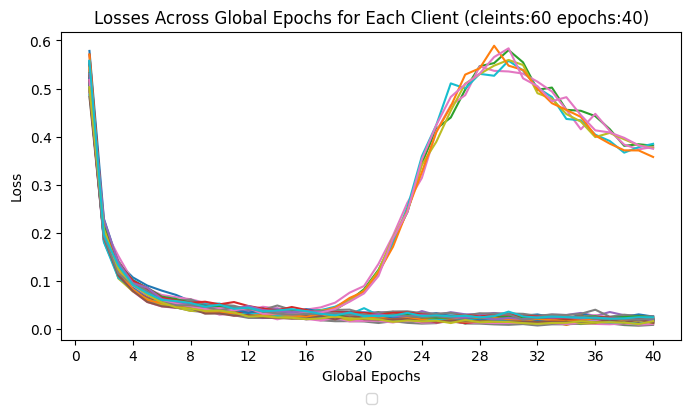

In [69]:
import matplotlib.pyplot as plt

# Initialize lists to store client losses
client_losses = [[] for _ in range(60)]

# Read the contents of the text file
with open("/kaggle/input/log-txt/gdrift_60_40_30_nadap.txt", "r") as file:
    lines = file.readlines()

# Parse the lines and extract loss values for each client
for line in lines:
    if "Training Client" in line:
        parts = line.split(" ")
        client_idx = int(parts[2].split("/")[0]) - 1
    elif line.startswith("Epoch"):
        loss = float(line.split(", Loss: ")[1].split(",")[0])
        client_losses[client_idx].append(loss/100)

# Plotting
plt.figure(figsize=(8, 4))
for i, losses in enumerate(client_losses):
    if losses:  # Check if there are any losses recorded for this client
        plt.plot(range(1, len(losses) + 1), losses)

plt.xlabel("Global Epochs")
plt.ylabel("Loss")
plt.title("Losses Across Global Epochs for Each Client (cleints:60 epochs:40)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8)
plt.grid(False)
plt.xticks(range(0, max(len(losses) for losses in client_losses) + 1,4))  # Set xticks based on maximum epochs any client has
plt.savefig("file_name.png")
plt.show()


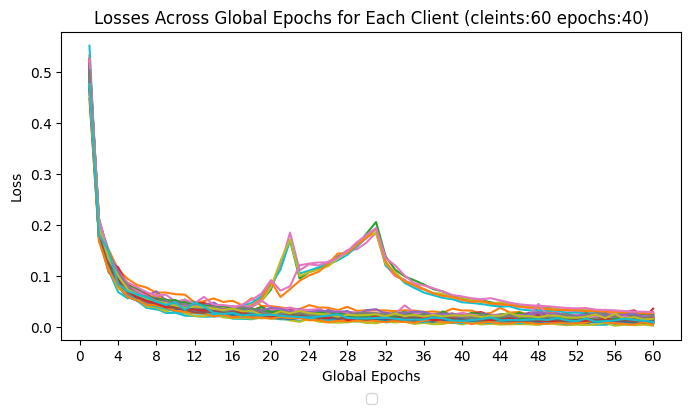

In [70]:
import matplotlib.pyplot as plt

# Initialize lists to store client losses
client_losses = [[] for _ in range(60)]

# Read the contents of the text file 14072024.txt
with open("/kaggle/input/log-txt/gdrift_60_40_30_adap.txt", "r") as file:
    lines = file.readlines()

# Parse the lines and extract loss values for each client
for line in lines:
    if "Training Client" in line:
        parts = line.split(" ")
        client_idx = int(parts[2].split("/")[0]) - 1
    elif line.startswith("Epoch"):
        loss = float(line.split(", Loss: ")[1].split(",")[0])
        client_losses[client_idx].append(loss/100)

# Plotting
plt.figure(figsize=(8, 4))
for i, losses in enumerate(client_losses):
    if losses:  # Check if there are any losses recorded for this client
        plt.plot(range(1, len(losses) + 1), losses)

plt.xlabel("Global Epochs")
plt.ylabel("Loss")
plt.title("Losses Across Global Epochs for Each Client (cleints:60 epochs:40)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8)
plt.grid(False)
plt.xticks(range(0, max(len(losses) for losses in client_losses) + 1,4))  # Set xticks based on maximum epochs any client has
plt.savefig("file_name.png")
plt.show()


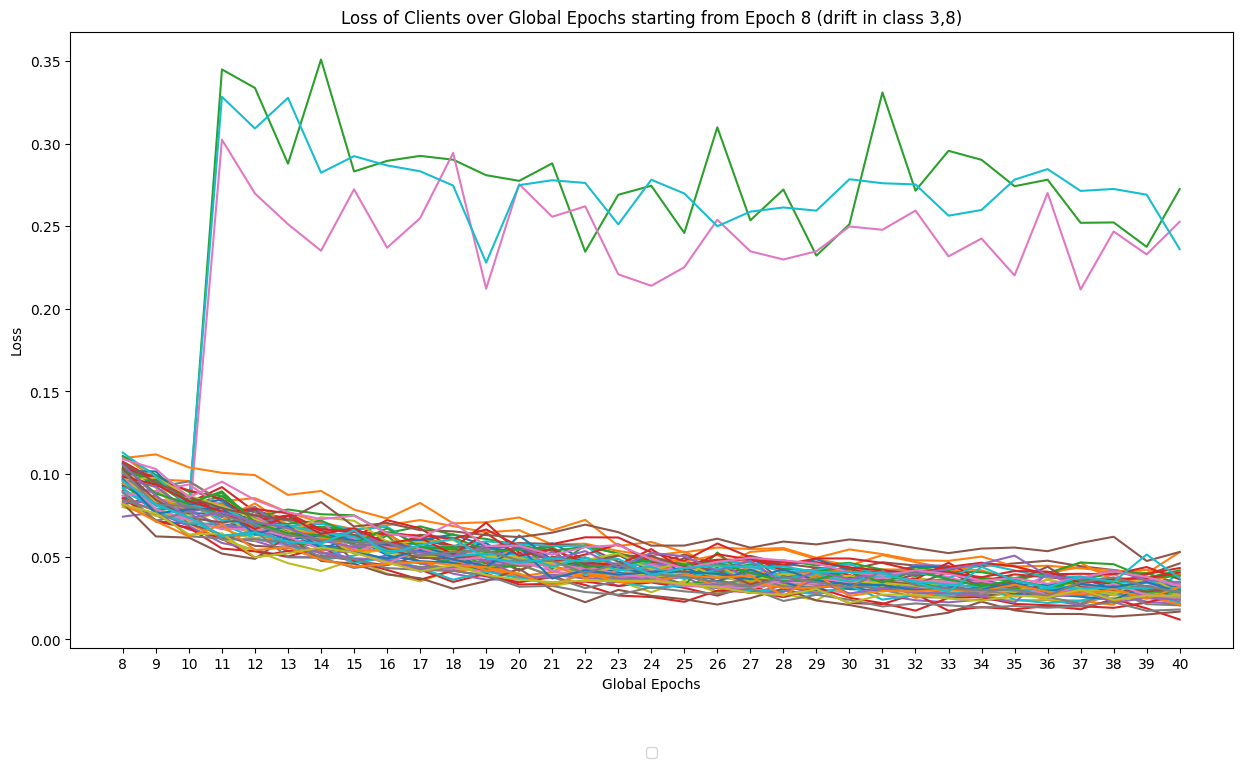

In [14]:
import matplotlib.pyplot as plt

# Initialize lists to store client losses
client_losses = [[] for _ in range(60)]

# Read the contents of the text file
with open("/kaggle/input/log-txt/17062024.txt", "r") as file:
    lines = file.readlines()

# Parse the lines and extract loss values for each client
for line in lines:
    if "Training Client" in line:
        parts = line.split(" ")
        client_idx = int(parts[2].split("/")[0]) - 1
    elif line.startswith("Epoch 1/1"):
        loss = float(line.split(", Loss: ")[1].split(",")[0])
        client_losses[client_idx].append(loss/32)

# Plotting
plt.figure(figsize=(15, 8))
for i, losses in enumerate(client_losses):
    # Skip clients with less than 8 epochs of data
    if len(losses) >= 8:
        plt.plot(range(8, len(losses) + 1), losses[7:])

plt.xlabel("Global Epochs")
plt.ylabel("Loss")
plt.title("Loss of Clients over Global Epochs starting from Epoch 8 (drift in class 3,8)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8)
plt.grid(False)
plt.xticks(range(8, 41))  # Start x-axis ticks from 8
plt.savefig("file_name.png")
plt.show()

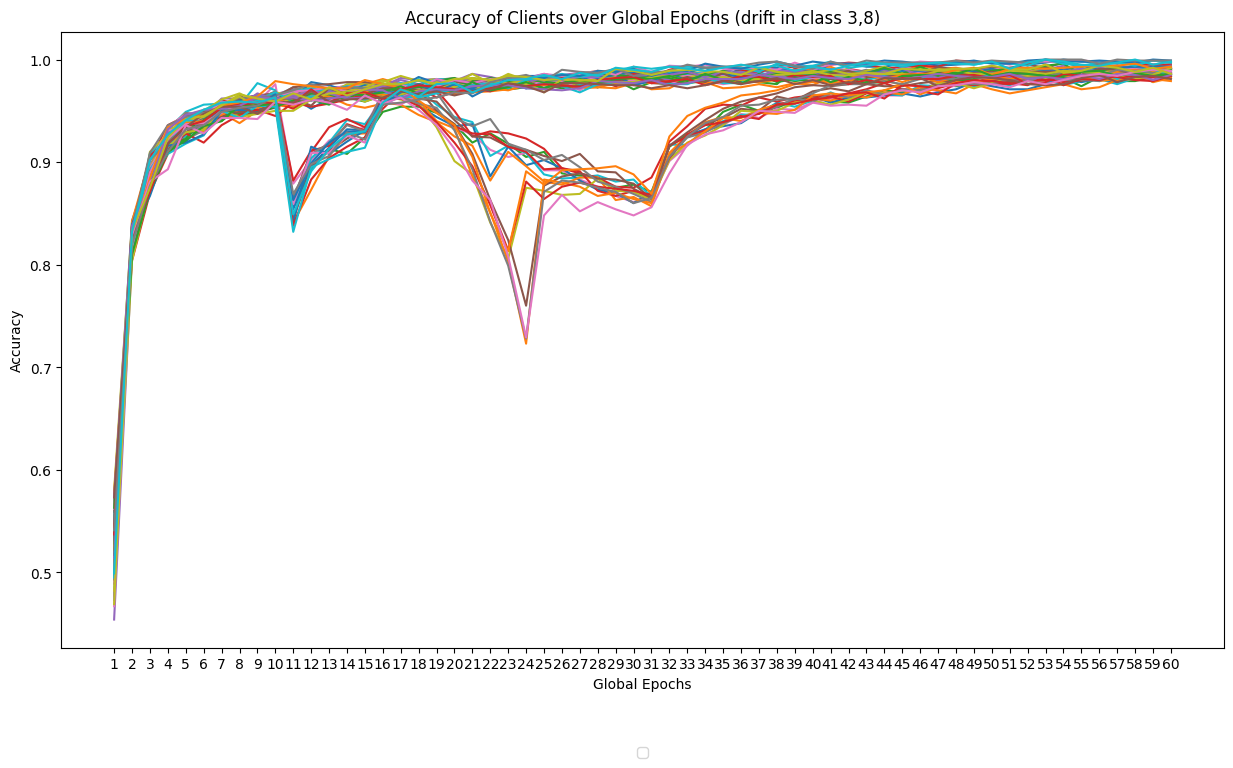

In [14]:
import matplotlib.pyplot as plt

# Initialize lists to store client accuracies
client_accuracies = [[] for _ in range(60)]

# Read the contents of the text file 17062024
with open("/kaggle/input/log-txt/test_test_hybrid.txt", "r") as file:
    lines = file.readlines()

# Parse the lines and extract accuracy values for each client
for line in lines:
    if "Training Client" in line:
        parts = line.split(" ")
        client_idx = int(parts[2].split("/")[0]) - 1
    elif line.startswith("Epoch 1/1"):
        accuracy = float(line.split("Accuracy: ")[1].strip())
        client_accuracies[client_idx].append(accuracy)

# Plotting
plt.figure(figsize=(15, 8))
for i, accuracies in enumerate(client_accuracies):
    # Skip clients with less than 8 epochs of data
    if len(accuracies) >= 8:
        plt.plot(range(1, len(accuracies) + 1), accuracies)

plt.xlabel("Global Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy of Clients over Global Epochs (drift in class 3,8)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8)
plt.grid(False)
plt.xticks(range(1, 61))  # Start x-axis ticks from 1
plt.savefig("accuracy_plot.png")
plt.show()
